# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Data Problem Definition
*The goal is to provide the list of data features that impacts the used car price the most by applying supervised machine learning with LinearRegression, Ridge and/or Lasso modeling on 46k car dataset containing features such as 'year', 'type', 'condition', 'cylinders', 'odometer' and etc.  This will be able to tell the used car dealership what drives the car prices or in another words, what the consumers want in a used car.  First, data needs to be studied and cleaned to make the data as useful as possible for ML, then apply GridSearchCV to find the best hyperparameters such as degree for PolynomialFeatures, n_components for PCA, n_cluster for KMeans and alpha for Ridge and Lasso models.  After getting the best hyperparameters, evaluate the model prediction and figure out the importance of the features from the dataset.  Given the initial result, the data and model can be more optimize to gain resource and processing time optimization.  Finally, after the optimization, with best performing modelling, the list of data features that impacts the car price can be finalized and provide the report to the dealer.*

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Data Observation Steps
1. *Check for data info, description, samples, and unique values and value counts first.*
2. *Check for the feature correlation.*
3. *Create plots for visual to understand data more.*

#### Data Observations
1. *Initial dataset contains 426880 samples and 18 features*
2. *There are 4 numeric and 14 object features*
3. *duplicate with initial dataset, but there likely be duplicates when some unneeded features are removed.  So need to check again later after some data cleaning.*
4. *year and odometer features are float instead of int*
5. *Correlation for numeric fields - Year and Odometer has not much correlation with price.*
6. *Price - the median is $13,950, but the average is $75,199 meaning the most of population is lower end side and there are extremely high value outliers*
7. *Year - While the mininum year is 1900, more meaningful data starts from 1960* 
8. *Odometer - Mean and Median are pretty close, so close to normal distribution*
9. *ID - Isn't meaningful feature for this analysis*
10. *vin - Irrelevant for the price*
11. *region - Overlapping with state.  More specific location than the state, however since this has too many values.*
    - *starting with state level to see if location has high impact on the price would be better.*
    - *And if it does, then we can go further into region with specific states having high impacts the pricing.* 
12. *manufacturer, type & model - Similar features and might be highly correlated, but will have to keep them for PCA because each of these types do have impact on price.*
    - *luxury manufacturer car would be more expansive such as Aston Martin and car like bus would be more expansive than sedan normally, so each have their own impact on the price.*
    - *exploring more on manufacturer data, it's found that astin martin has really low price.  It maybe either outlier or it's affected by other feature as it's "used" car price.*
13. *type - Different way of categorizing, similar to manufacturer to model relationship. Mapping back can be done after checking on the model.*
14. *fuel - most of the fuel type is gas which requires sylinders.  Electrics don't have any sylinders and probably taken out when removing NaN from sylinders as it's known that higher sylinders tend to have higher car price.*
15. *title_status - less than 2% is non-clean and 2% is NaN.  Other statuses will likely show up as outlier with small amount of data. It should be removed for proper testing of majority data.*  
16. *drive - usually rwd is equipped with more luxury cars than the fwd and also, 4wd is always more expansive than 2wd (rwd and fwd).  knowing this and the fact that the dataset is missing more than 30% of the values, we should remove this.*
    - *but initially it should be kept to see removing nulls for other features, such as condition and cyliders, would remove much of the drive null data as well to see if this feature can be kept as a whole*
17. *paint_color - similar reasoning as drive.  Specific color maybe more expansive, but 30% of data missing. The feature cannot be removed based on the existing knowledge of impacting on price for now.*
18. *Boxplot reveals that there are outliers in price (from 10000 sample data) near 1 million dollar, so removed for better visualization here.*
    - *Also it shows that there are a lot of outliers in price for each features*


In [80]:
# import random 
# from turtle import title
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

car_df = pd.read_csv('data/vehicles.csv')
#car_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

None

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
251769,7307137244,central NJ,41995,2018.0,bmw,740i,NaN,NaN,gas,34199.0,clean,automatic,WBA7E4C50JGV23622,NaN,full-size,sedan,white,nj
153023,7305676433,indianapolis,33600,2020.0,ford,transit t250,NaN,NaN,gas,37300.0,clean,automatic,NaN,NaN,NaN,NaN,white,in
149653,7310094811,"st louis, MO",7995,2013.0,fiat,500,NaN,4 cylinders,gas,95343.0,clean,manual,3C3CFFFH0DT574994,fwd,NaN,other,brown,il
3021,7311954883,huntsville / decatur,37990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,other,56302.0,clean,other,1G1YS3DW5A5103103,rwd,NaN,other,red,al
324880,7301925946,roseburg,48999,2014.0,ram,2500,NaN,6 cylinders,diesel,81074.0,clean,automatic,3C6UR5FL7EG190007,4wd,NaN,truck,NaN,or
354302,7316115146,knoxville,0,2019.0,kia,soul plus,good,NaN,gas,36700.0,clean,automatic,KNDJP3A55K7640632,fwd,NaN,hatchback,orange,tn
255099,7312497255,north jersey,18985,2015.0,mercedes-benz,e,NaN,NaN,gas,71734.0,clean,automatic,WDDHF8JB4FB134206,NaN,NaN,other,black,nj
407575,7316961664,seattle-tacoma,21999,2004.0,ford,f-250,NaN,NaN,diesel,118250.0,clean,automatic,1FTNX21P54EA53620,4wd,NaN,pickup,blue,wa
43413,7313903425,orange county,2000,2001.0,NaN,2001 MITS,good,4 cylinders,gas,178000.0,clean,automatic,NaN,NaN,compact,other,NaN,ca
10522,7316644697,phoenix,0,2020.0,jeep,grand cherokee,NaN,NaN,gas,8658.0,clean,automatic,NaN,rwd,NaN,NaN,NaN,az


'dups:  0'

,id,price,year,odometer
id,1.000000,-0.002779,-0.059040,0.010721
price,-0.002779,1.000000,-0.004925,0.010032
year,-0.059040,-0.004925,1.000000,-0.157215
odometer,0.010721,0.010032,-0.157215,1.000000


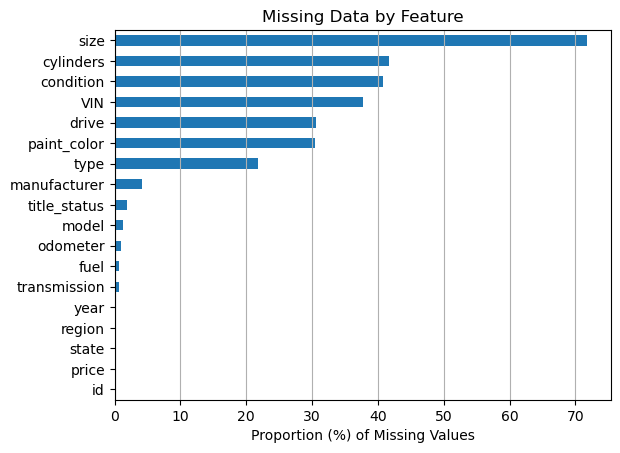

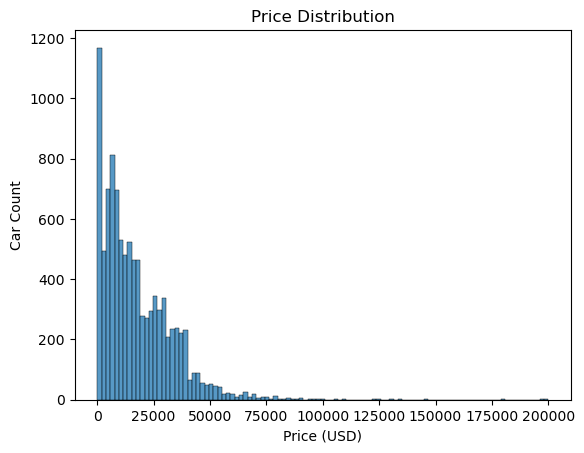

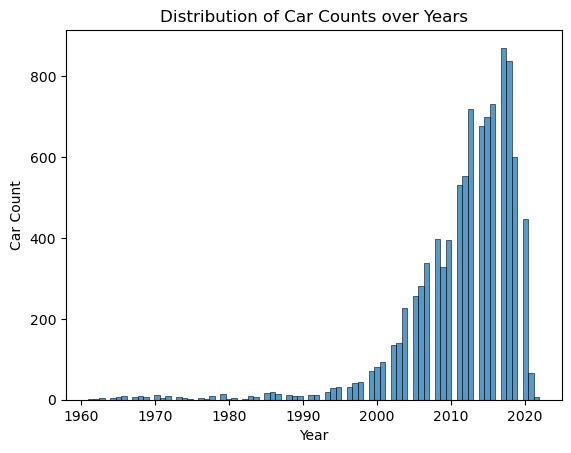

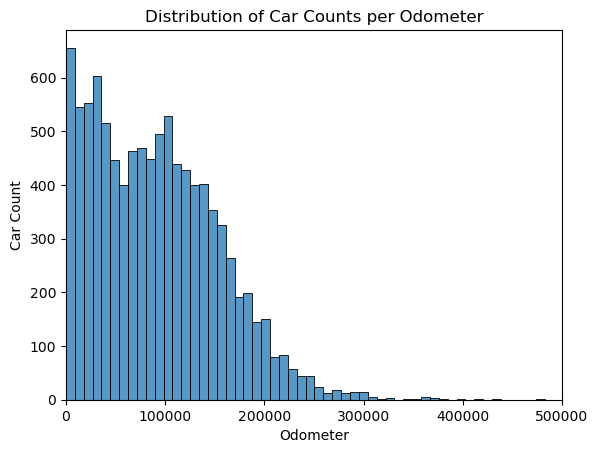

manufacturer    manufacturer
ford               0.166288
chevrolet          0.128992
toyota             0.080121
honda              0.049824
nissan             0.044666
jeep               0.044542
ram                0.042968
NaN                0.041337
gmc                0.039320
bmw                0.034434
dodge              0.032110
mercedes-benz      0.027682
hyundai            0.024218
subaru             0.022243
volkswagen         0.021891
kia                0.019811
lexus              0.019209
audi               0.017740
cadillac           0.016288
chrysler           0.014128
acura              0.014004
buick              0.012887
mazda              0.012713
infiniti           0.011249
lincoln            0.009886
volvo              0.007904
mitsubishi         0.007712
mini               0.005566
pontiac            0.005360
rover              0.004950
jaguar             0.004559
porsche            0.003242
mercury            0.002774
saturn             0.002553
alfa-romeo         

region            (404,)
manufacturer       (43,)
model           (29650,)
condition           (7,)
cylinders           (9,)
fuel                (6,)
title_status        (7,)
transmission        (4,)
drive               (4,)
size                (5,)
type               (14,)
paint_color        (13,)
state              (51,)
dtype: object

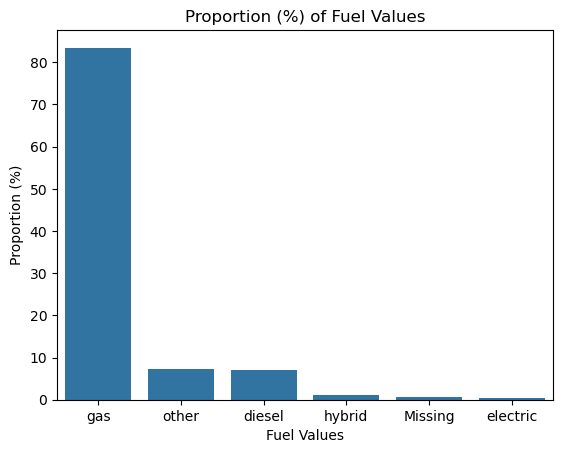

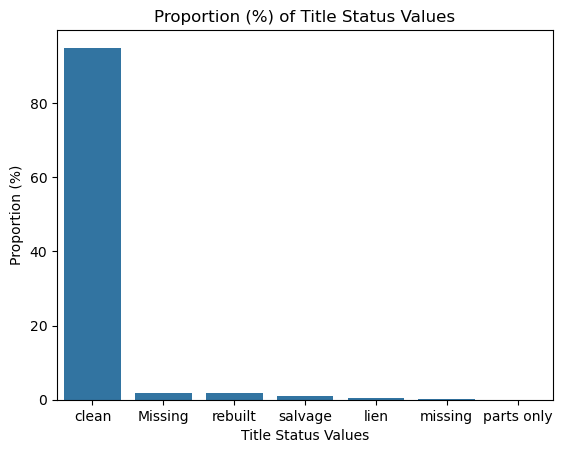

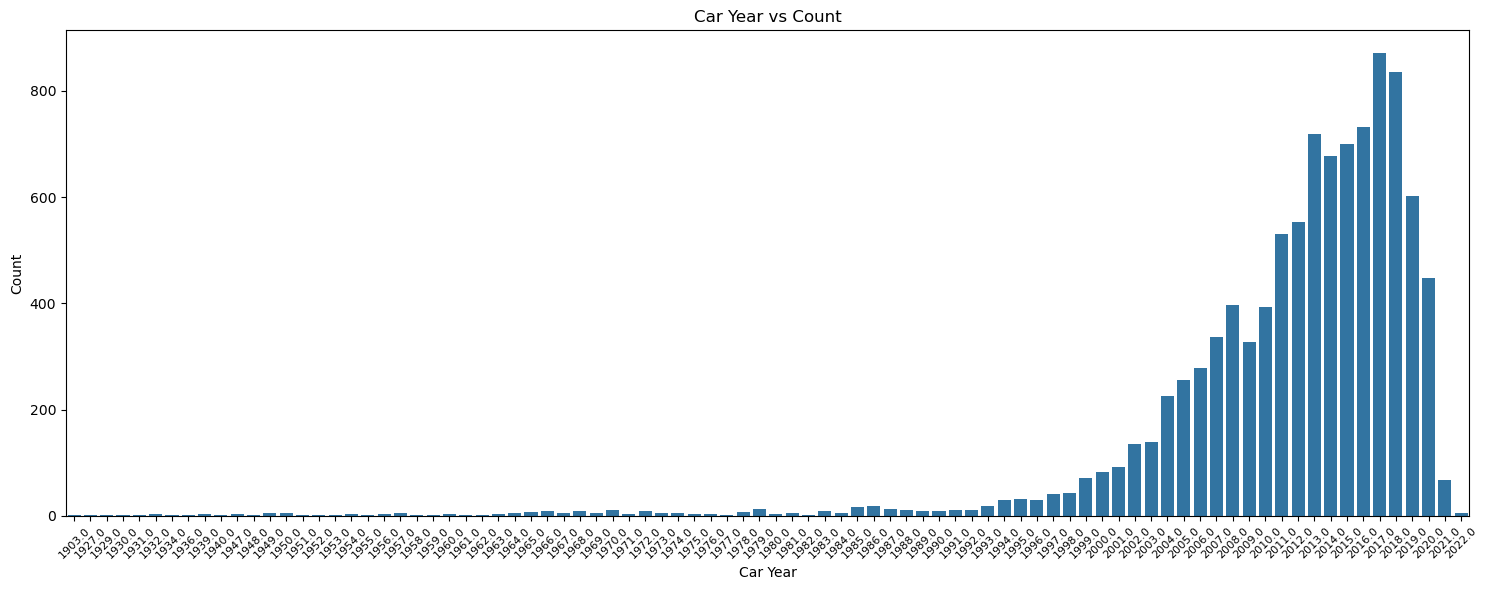

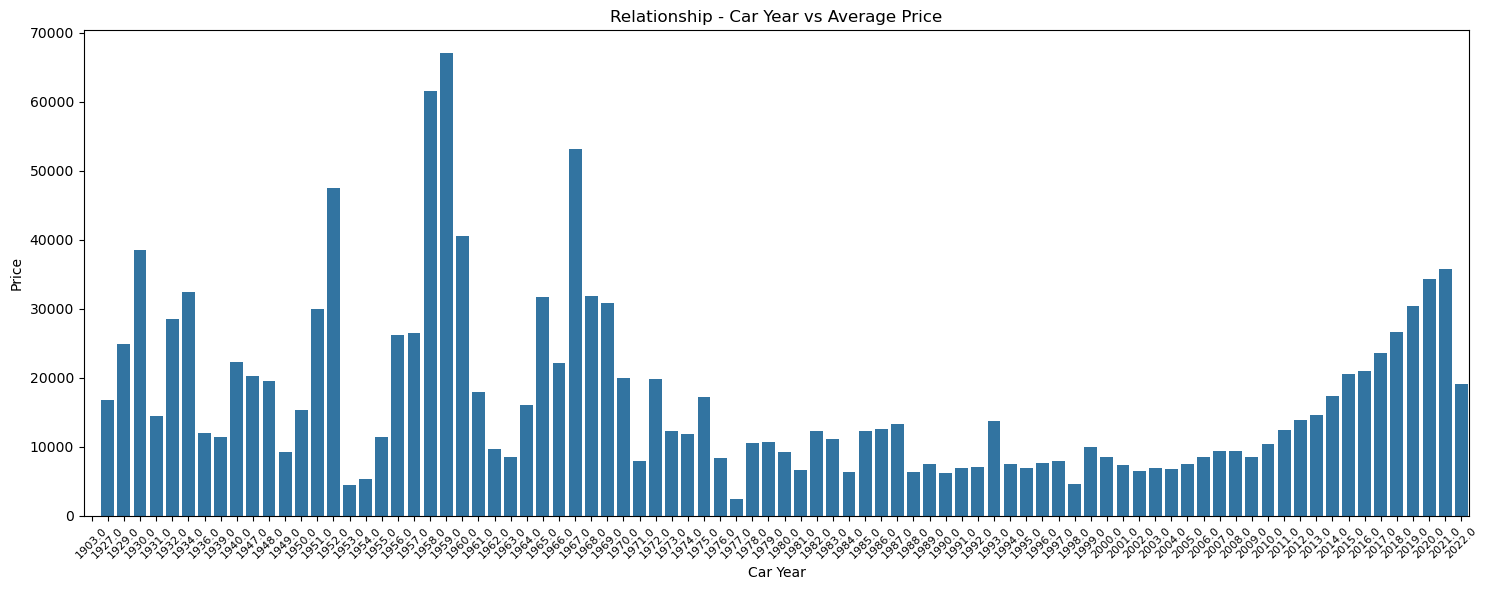

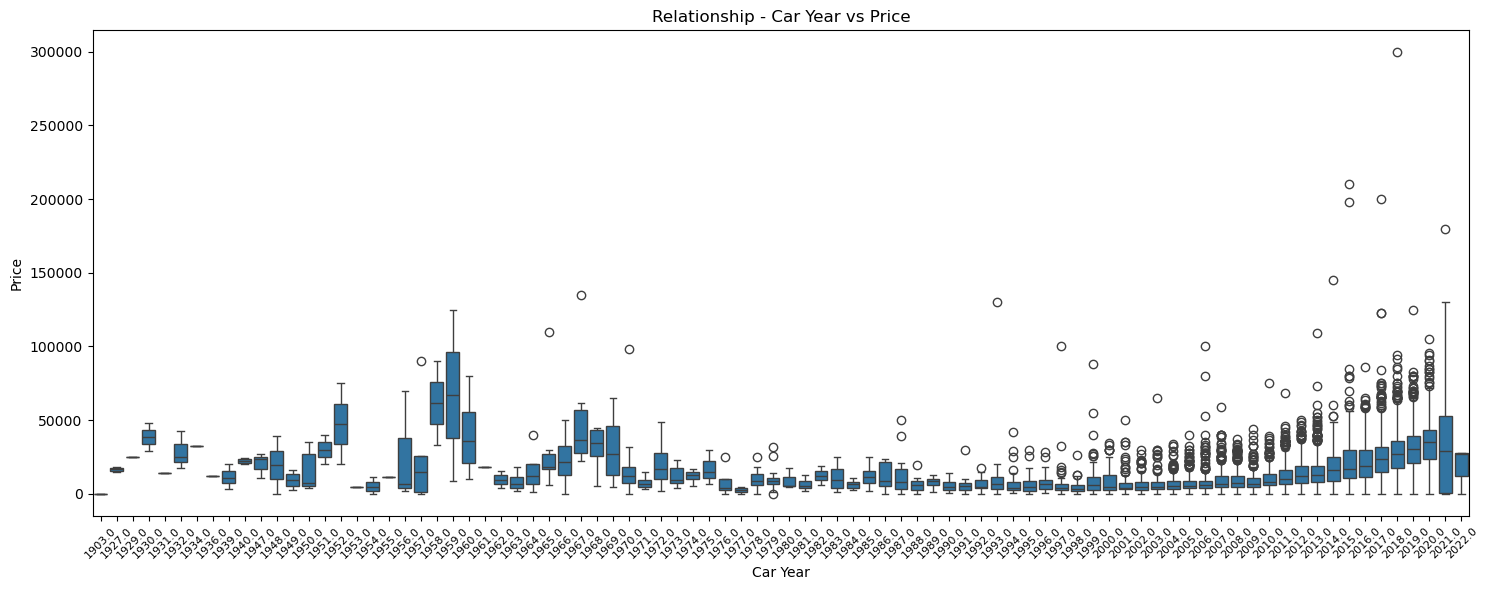

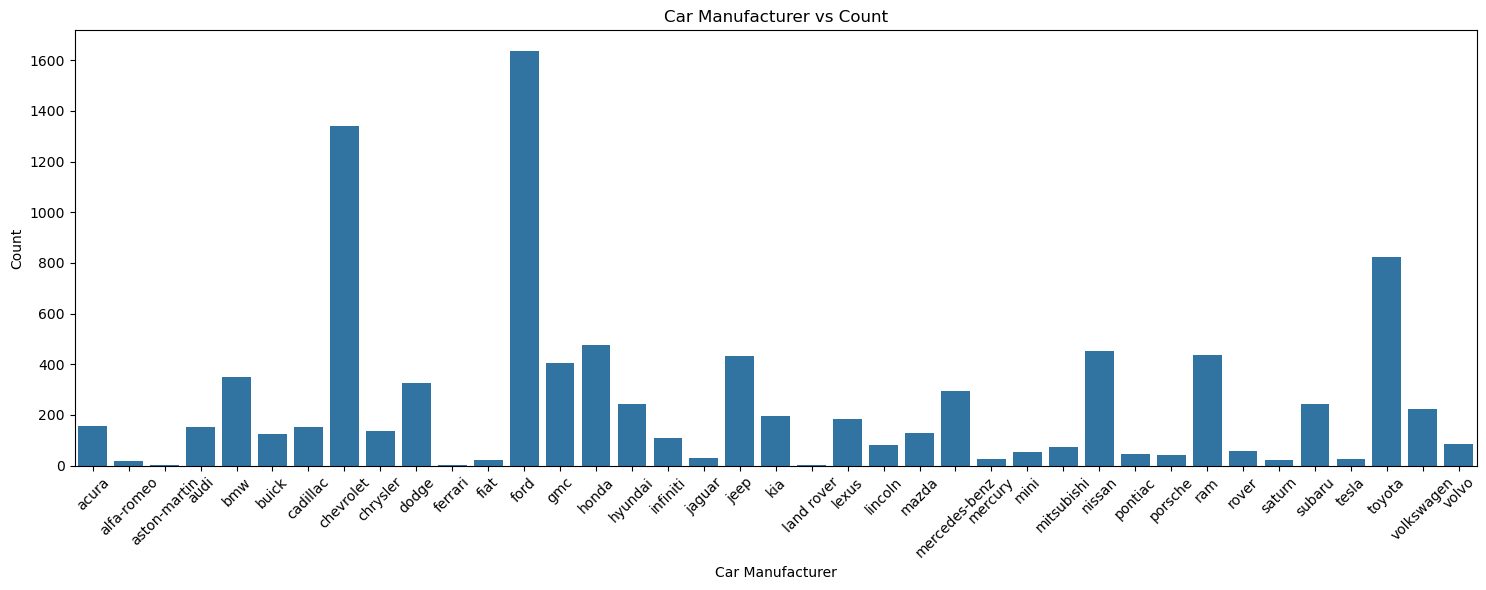

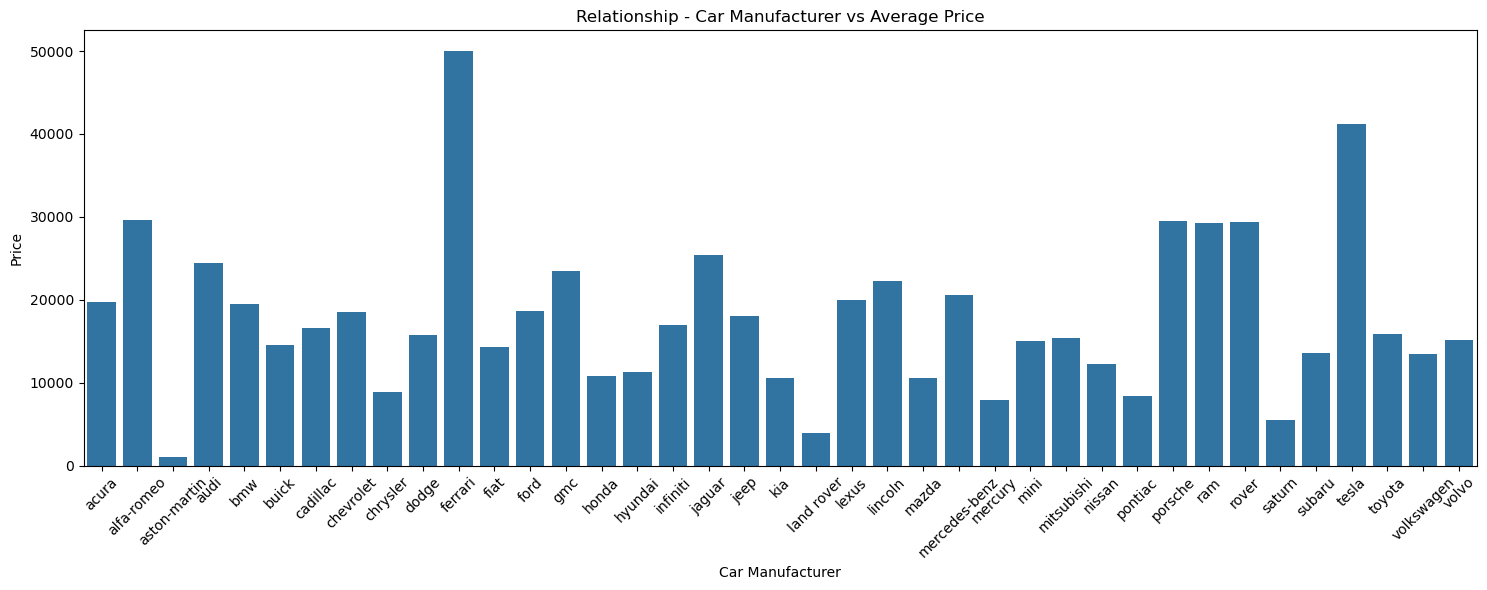

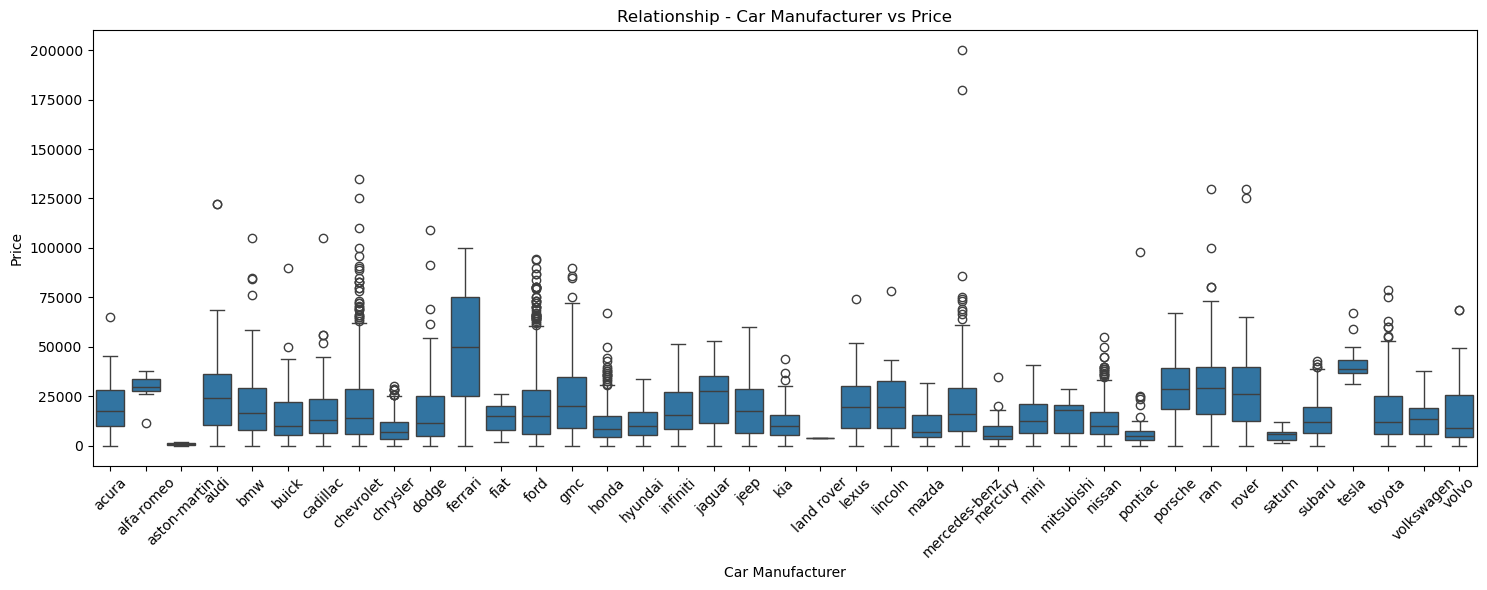

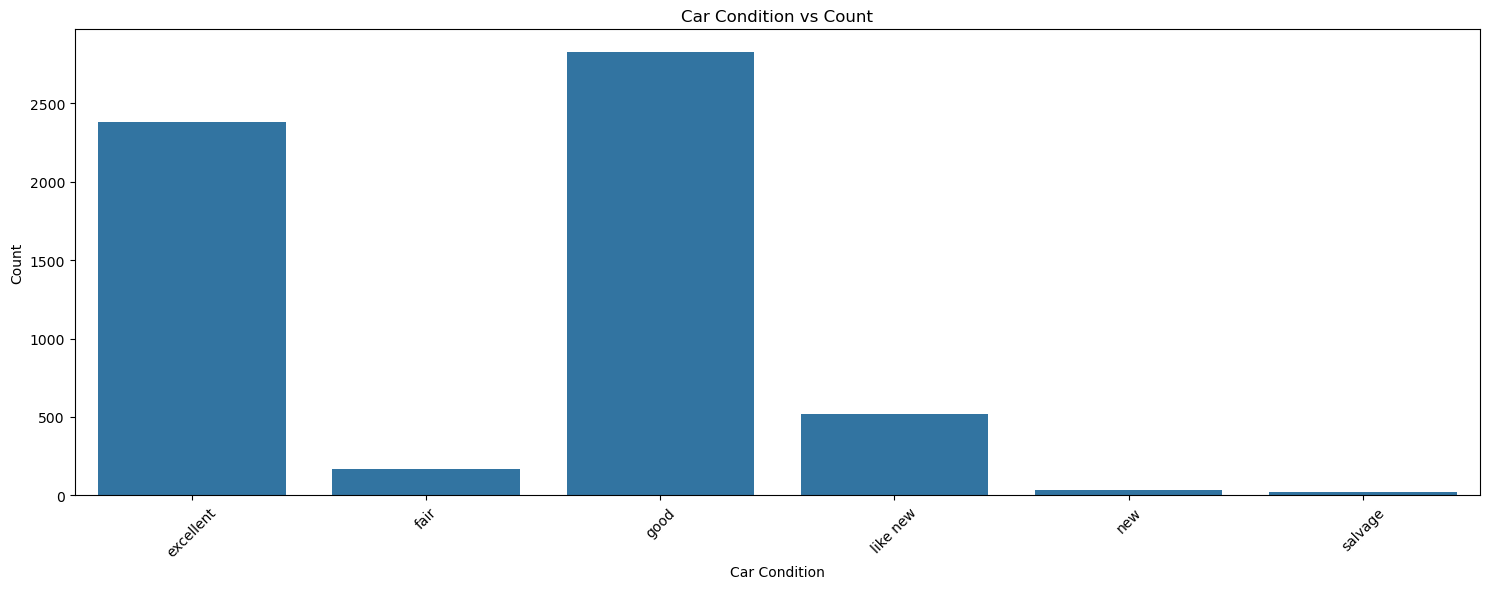

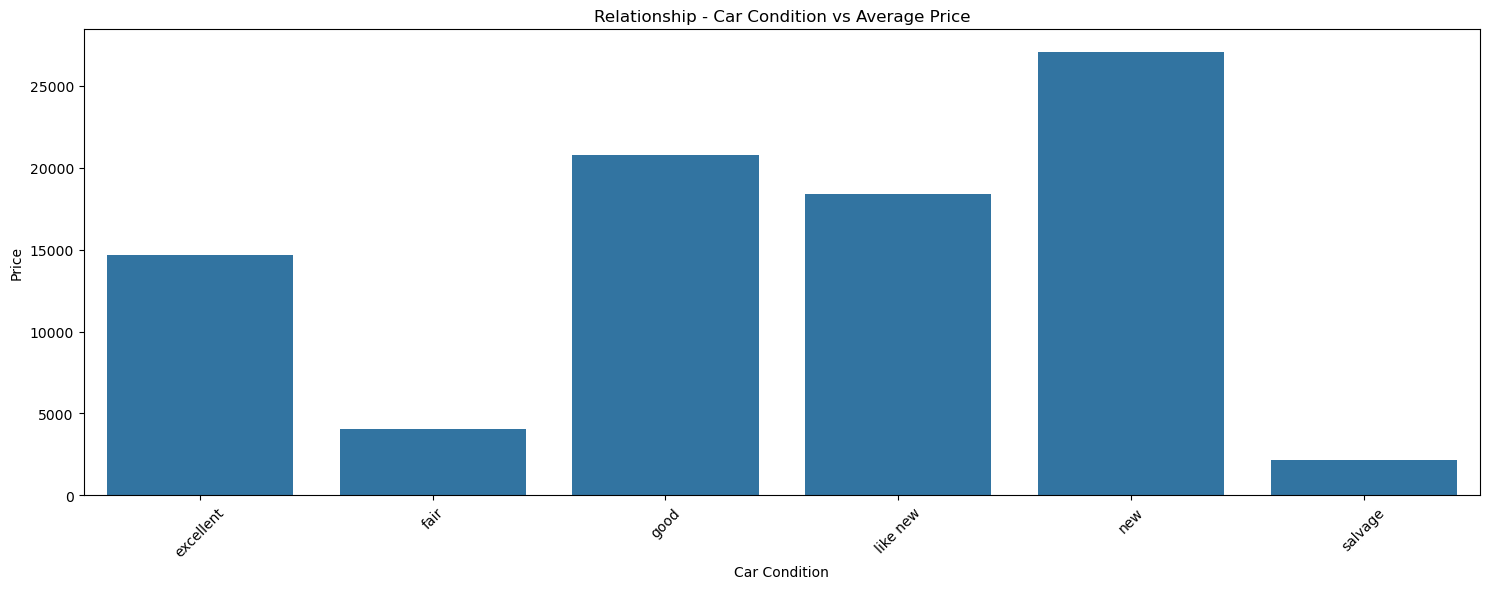

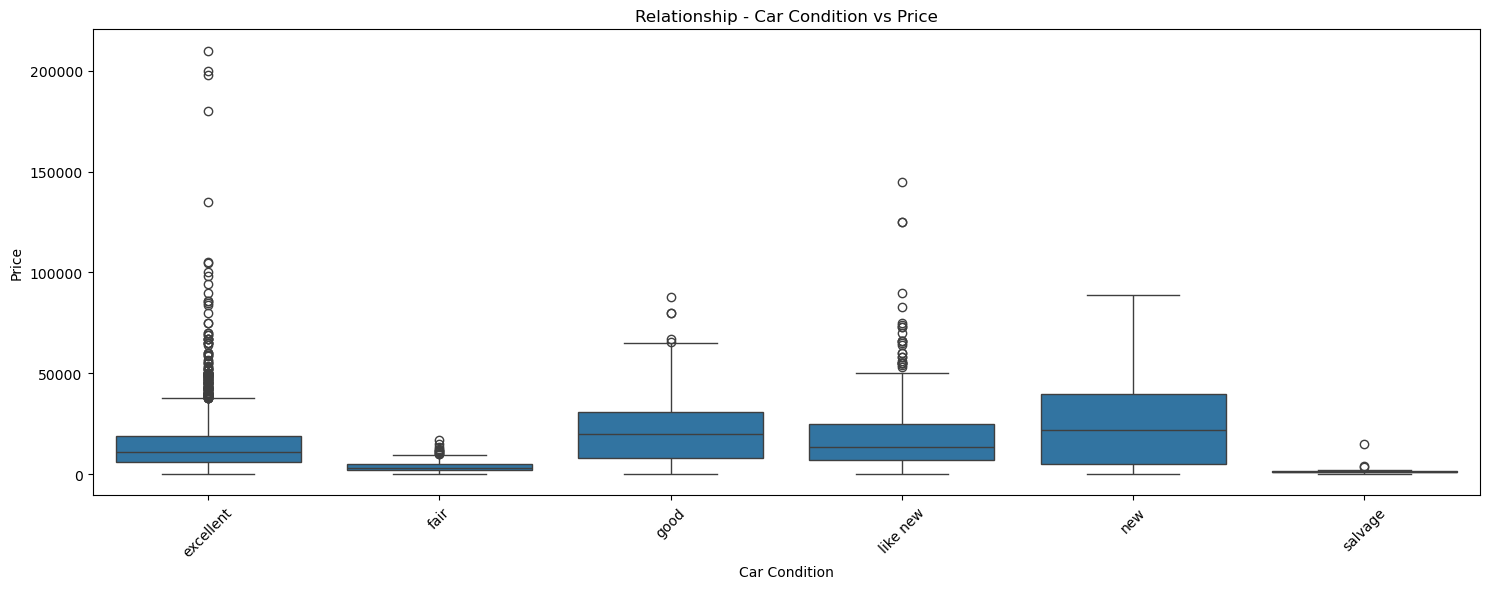

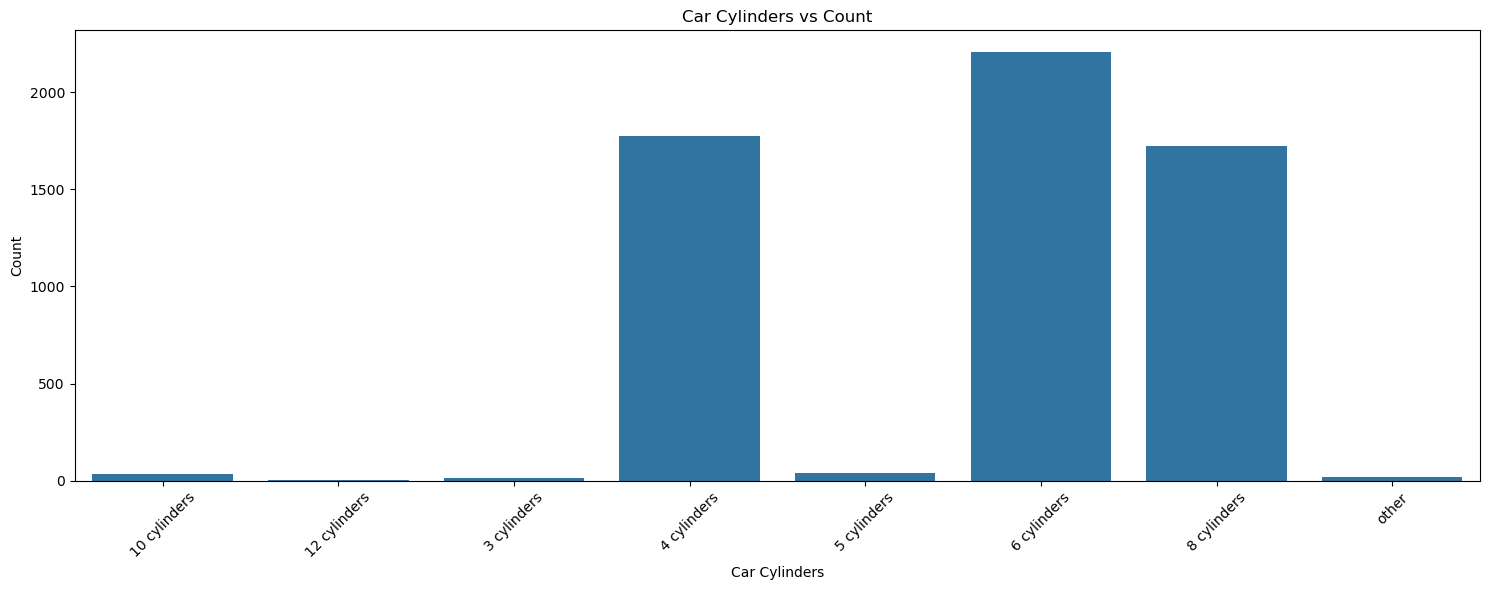

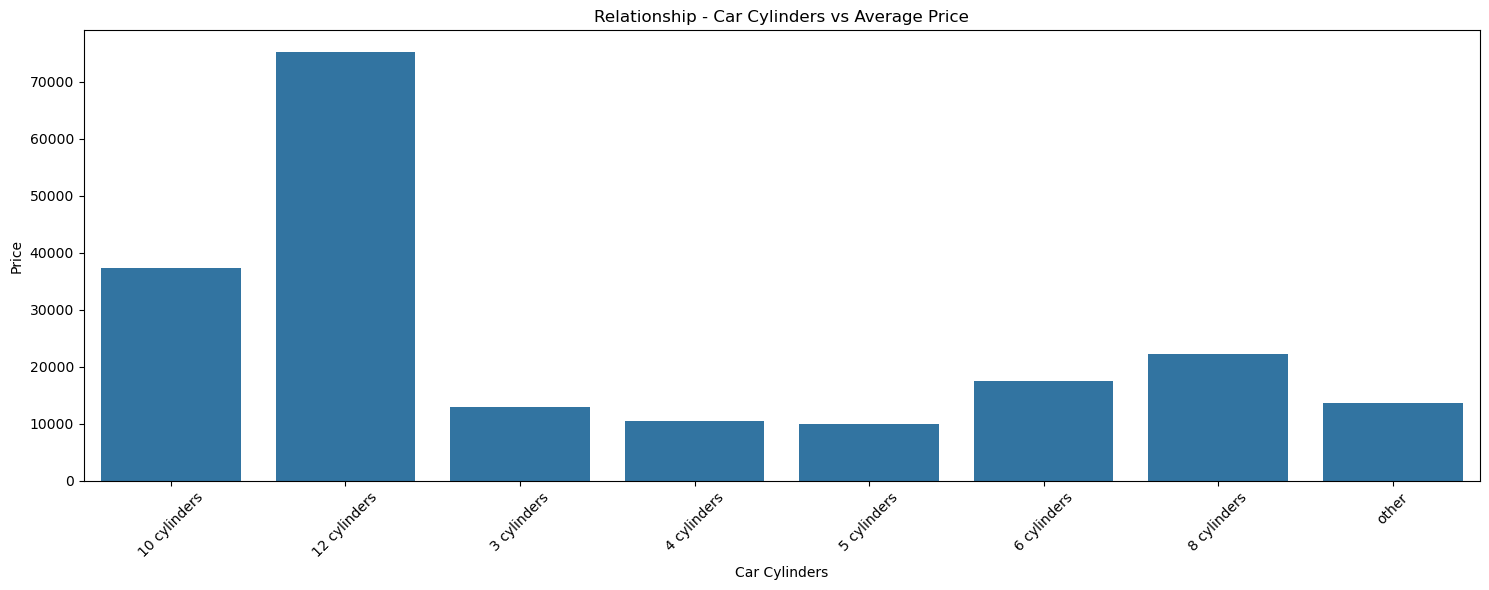

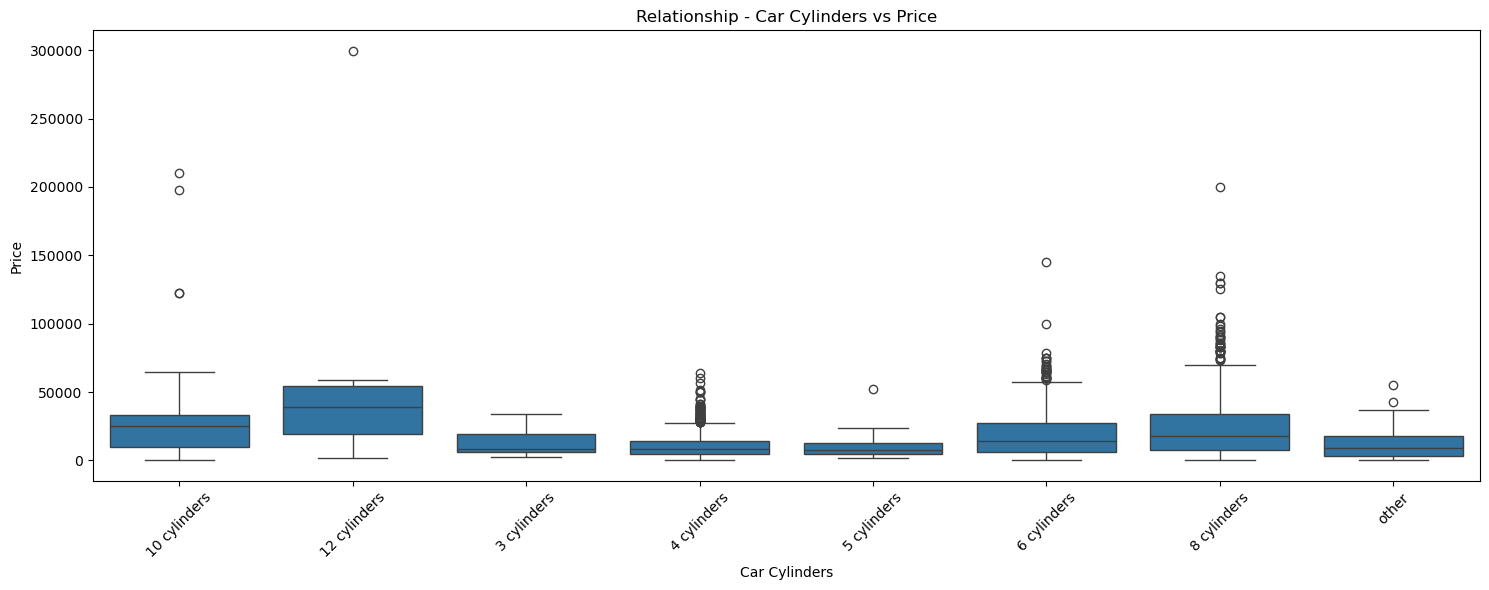

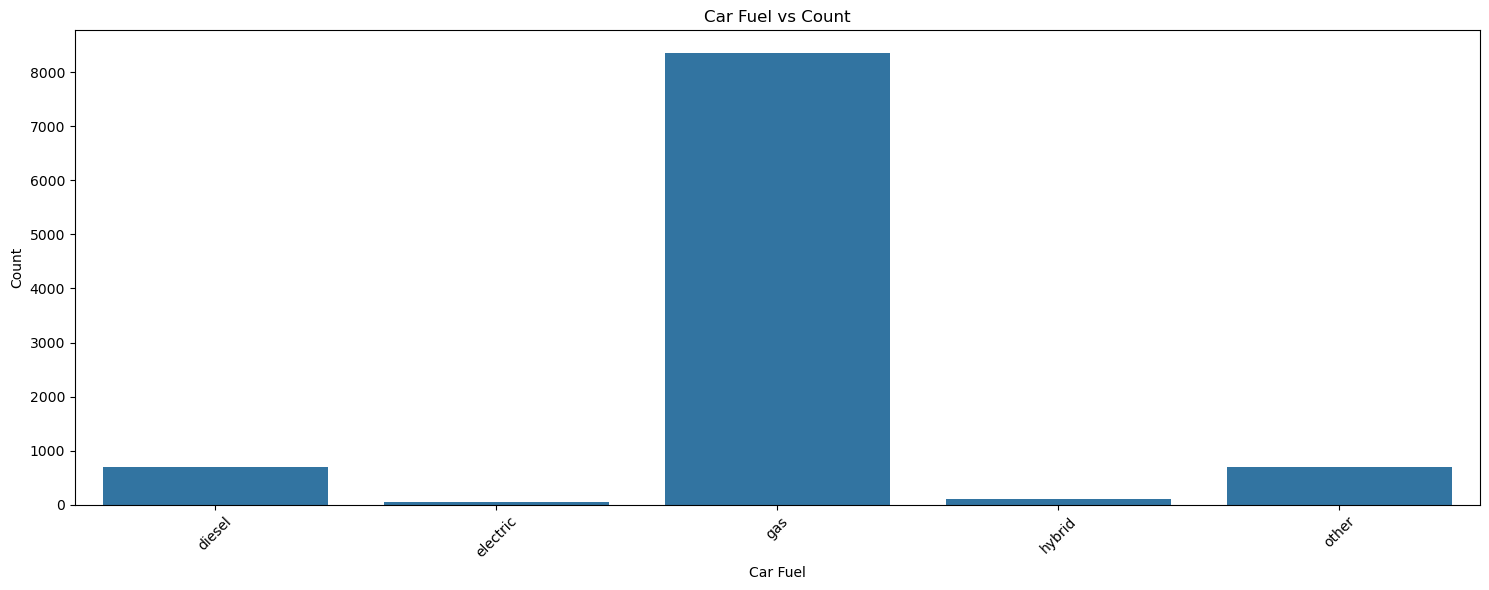

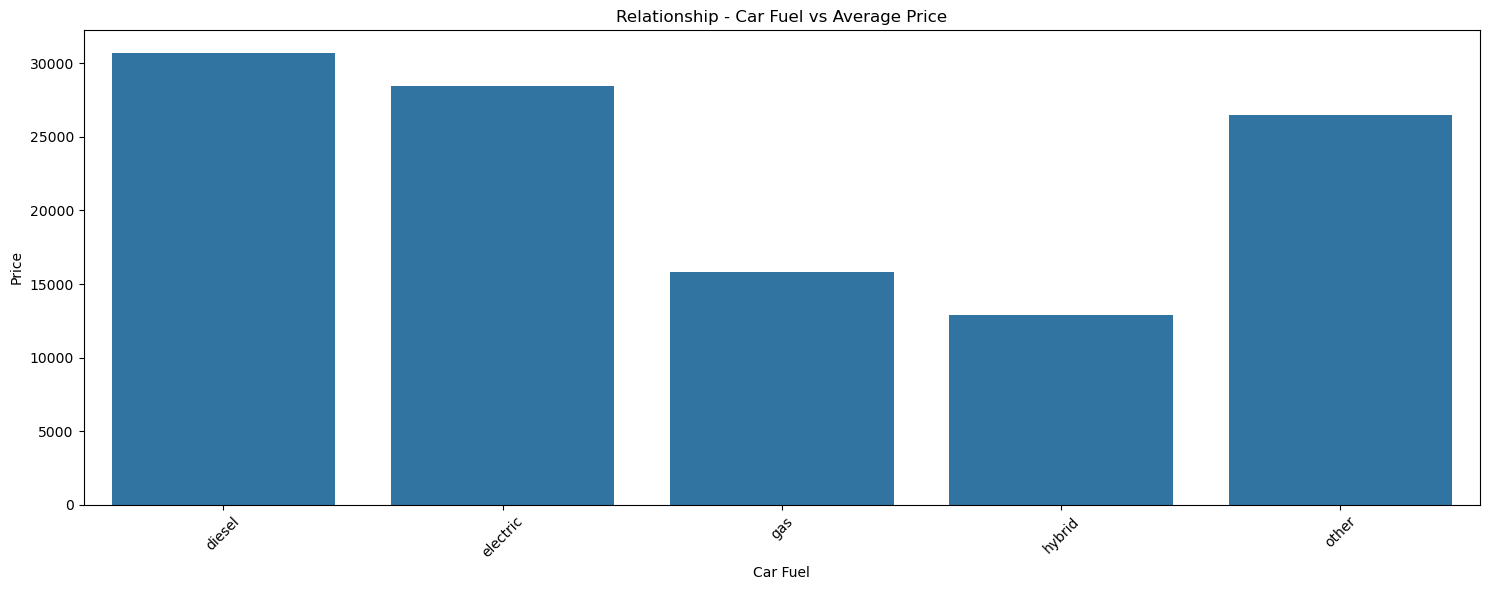

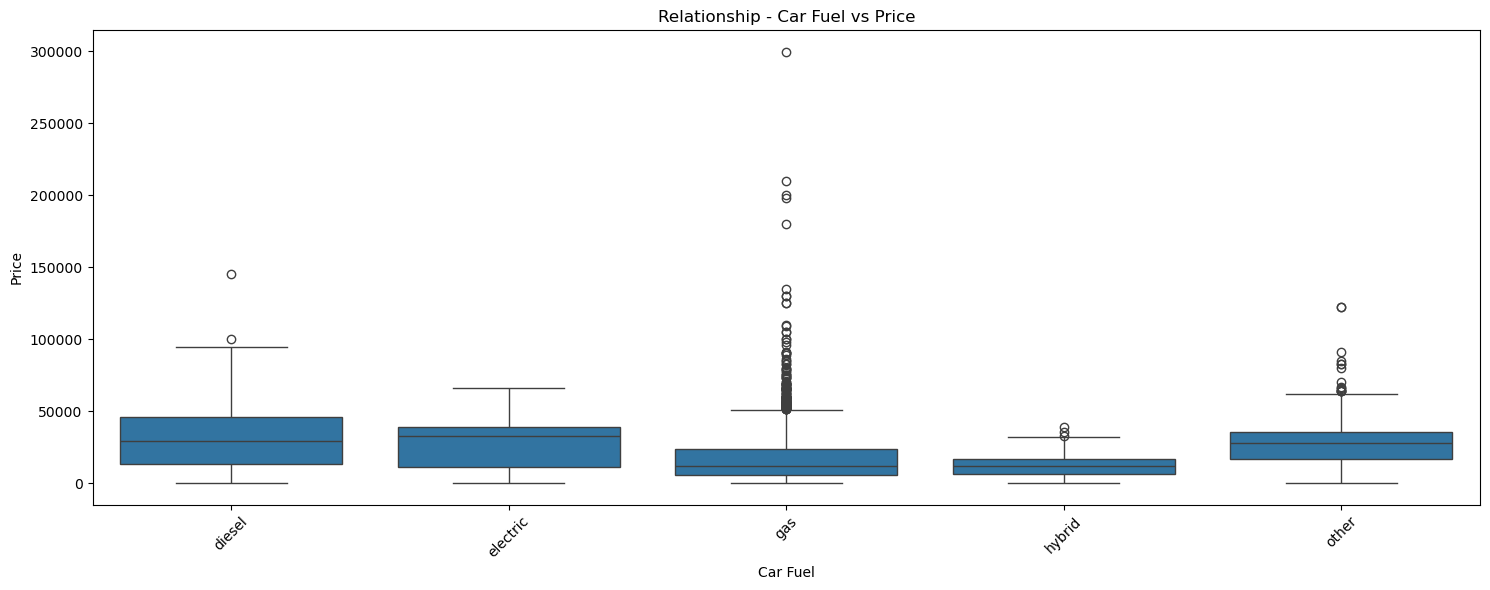

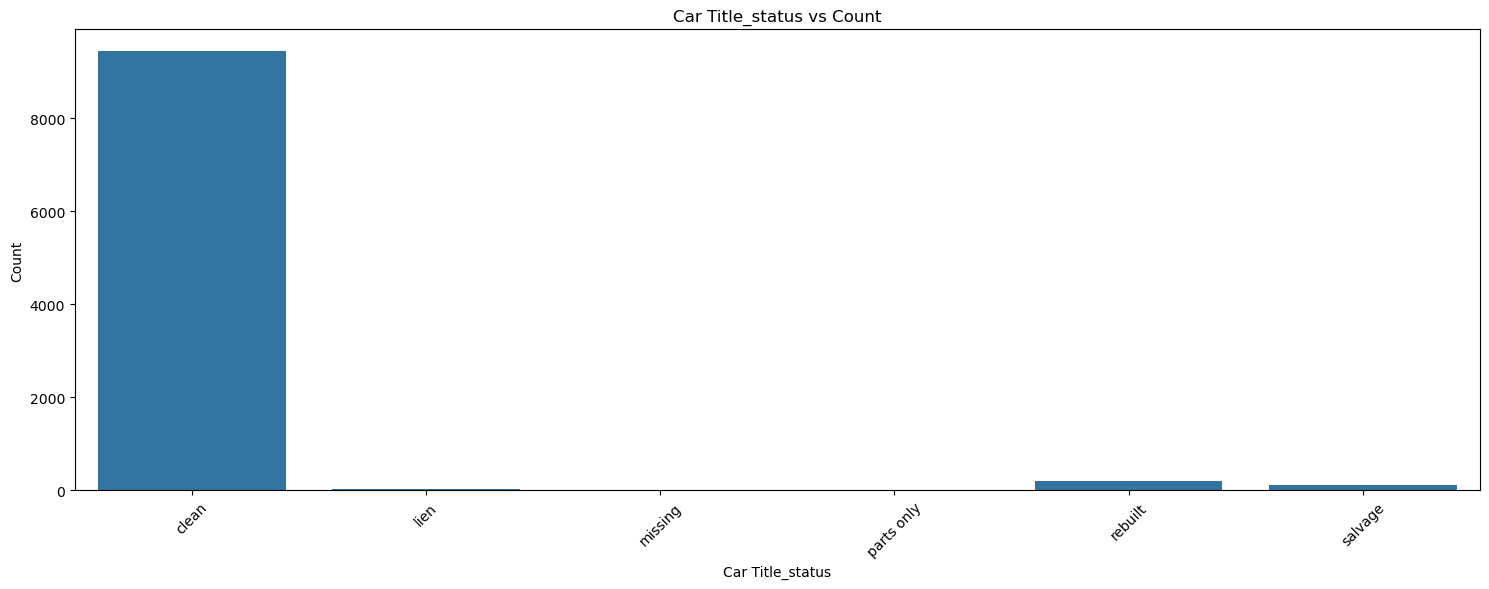

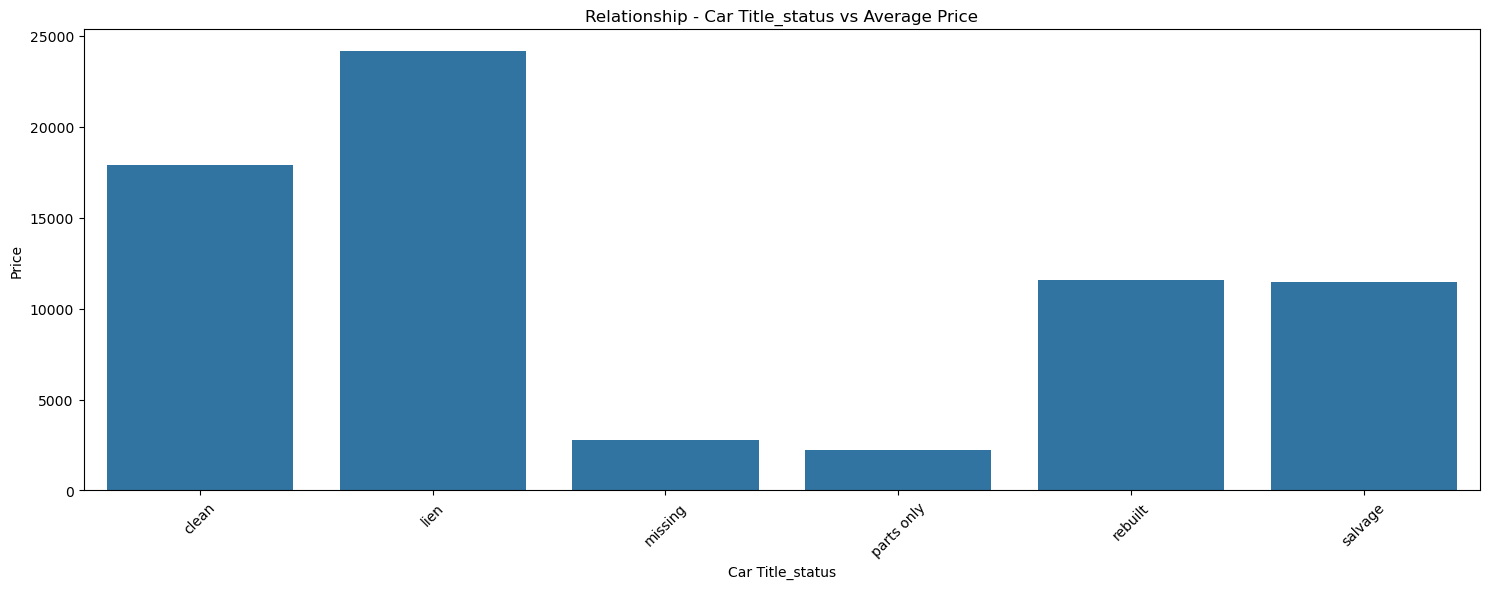

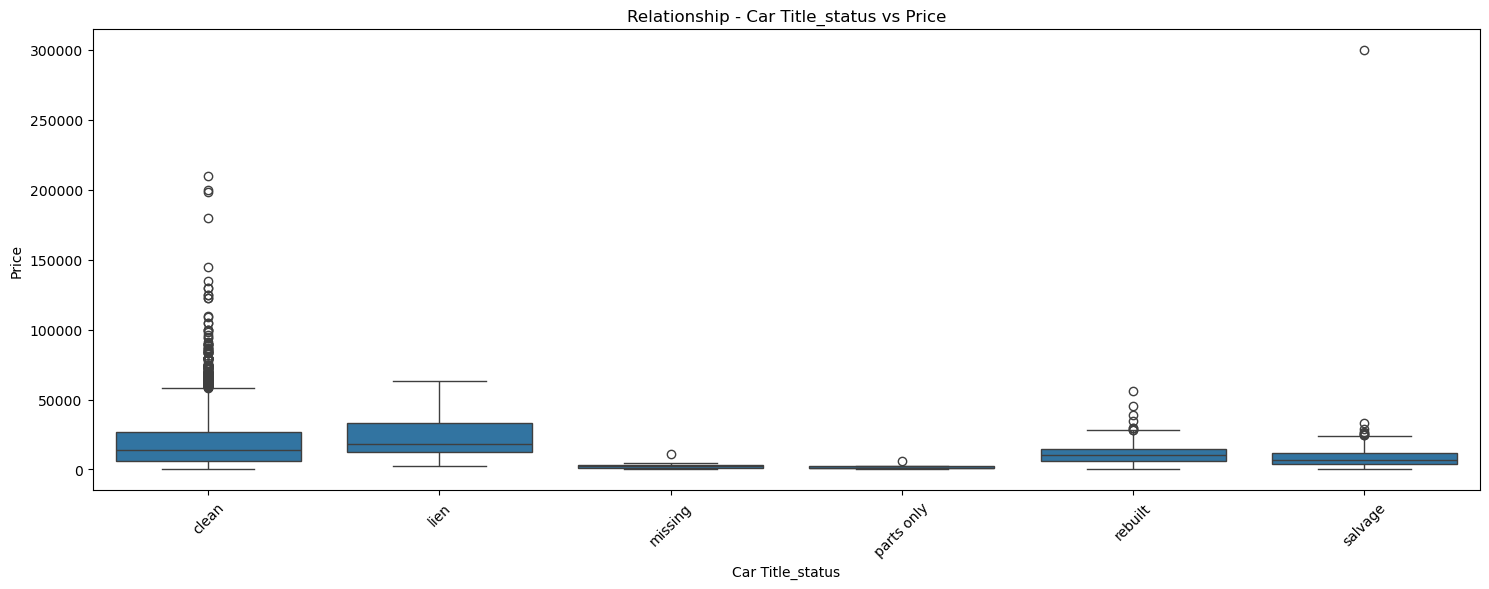

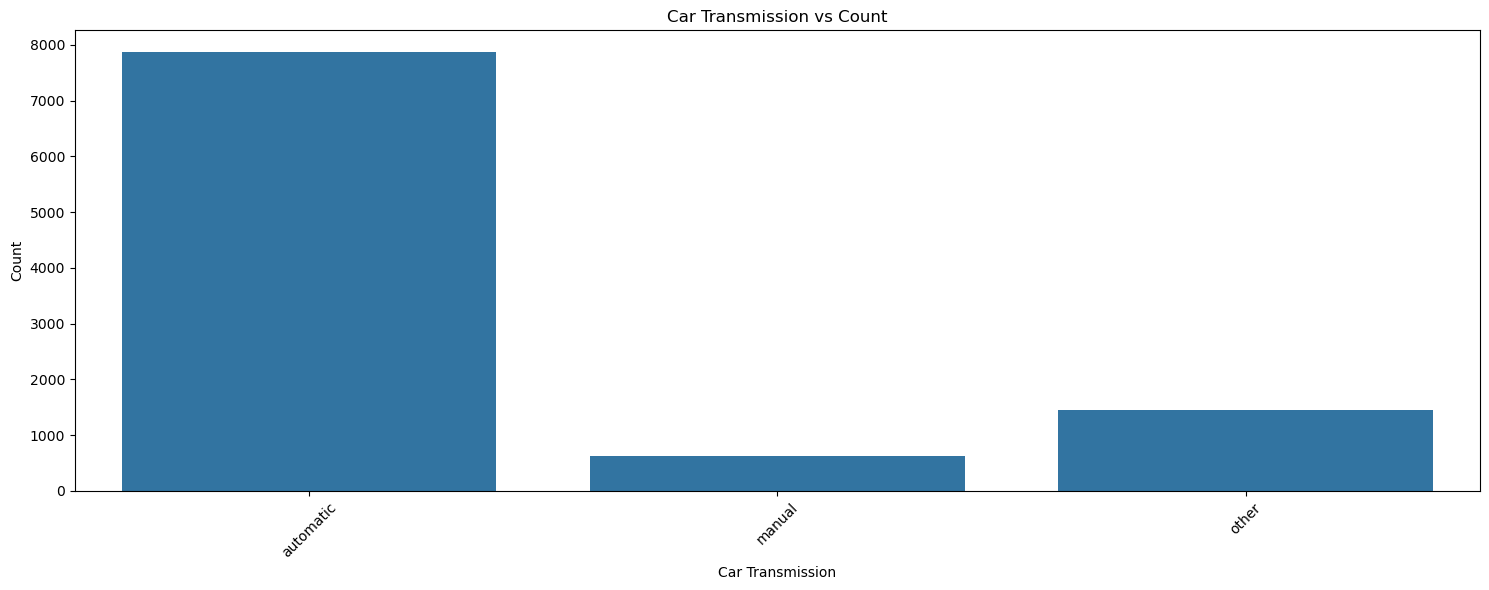

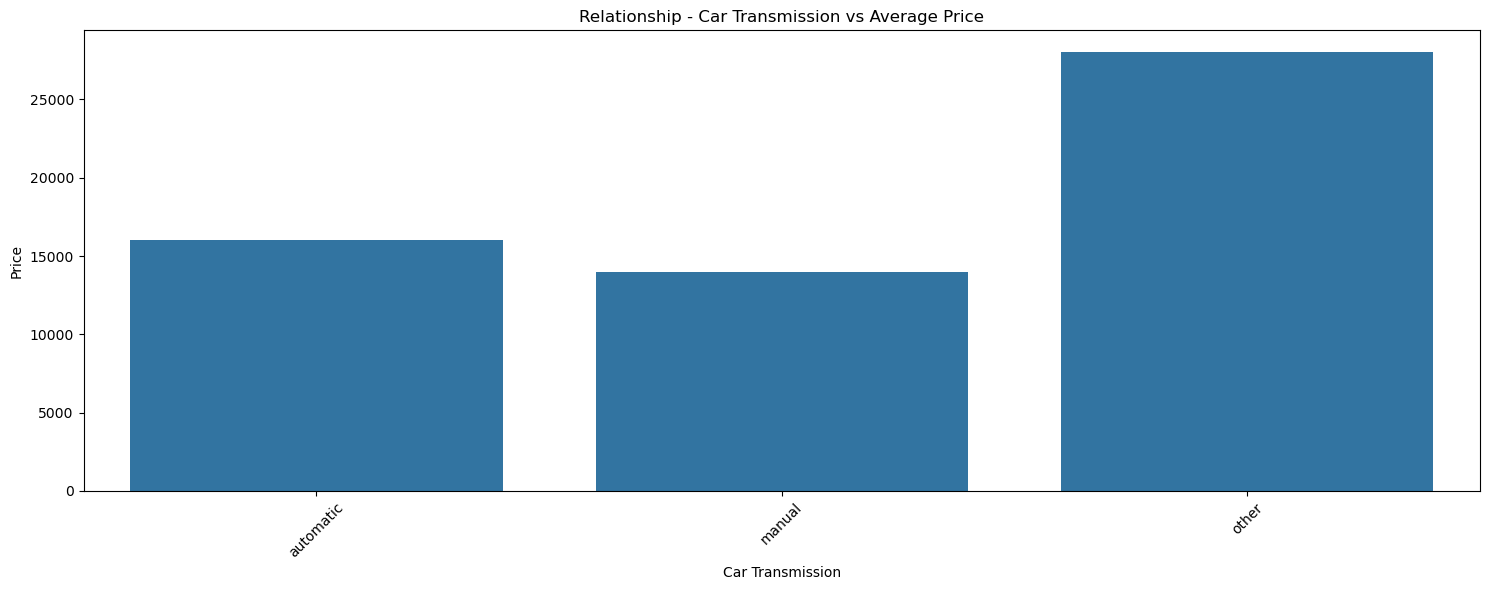

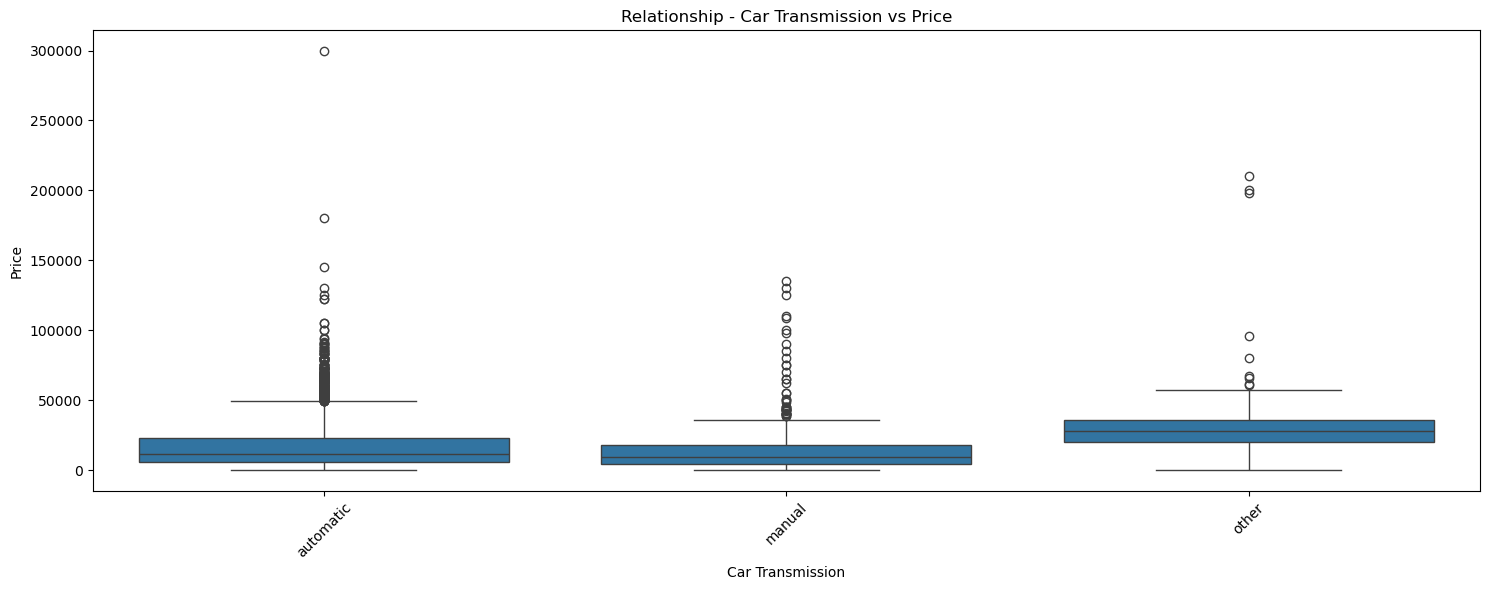

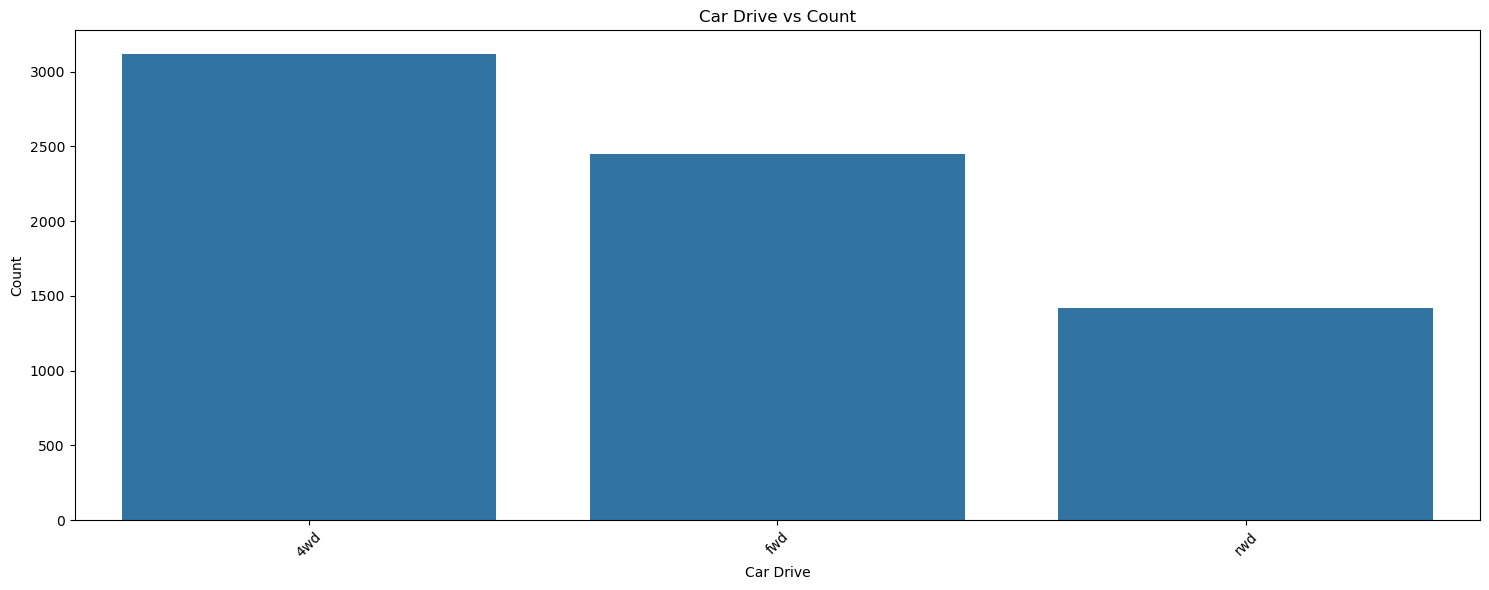

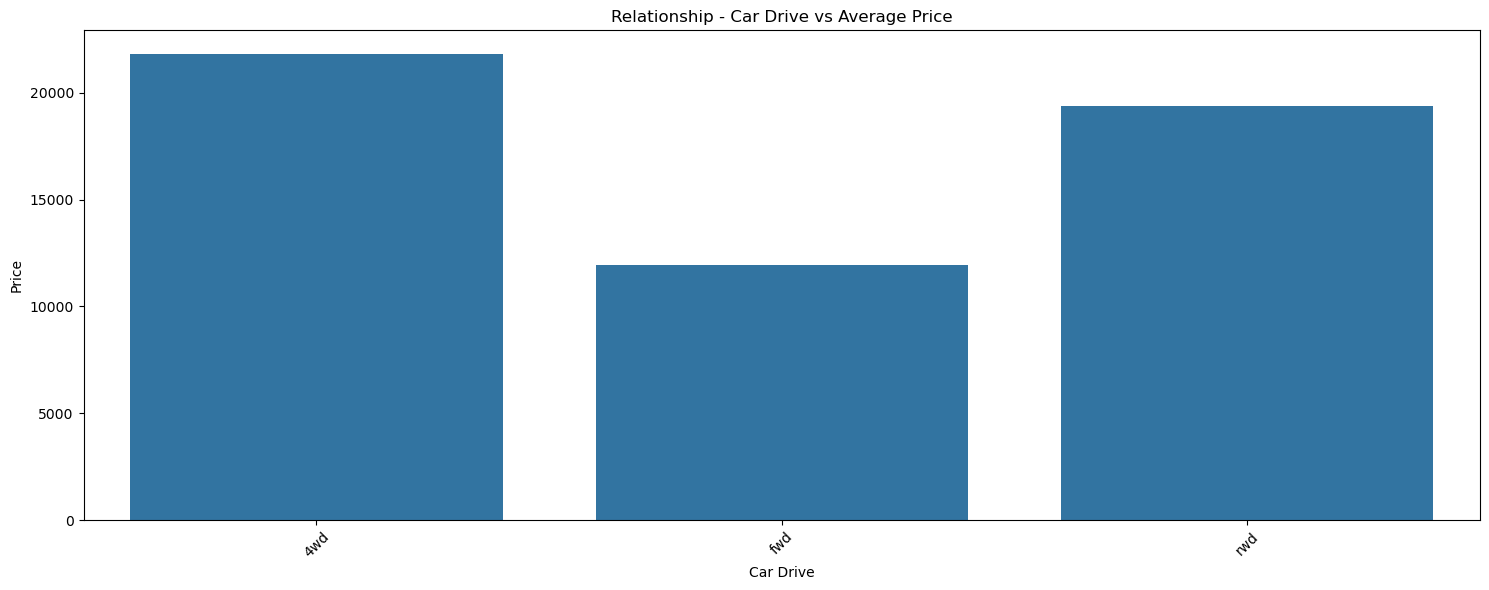

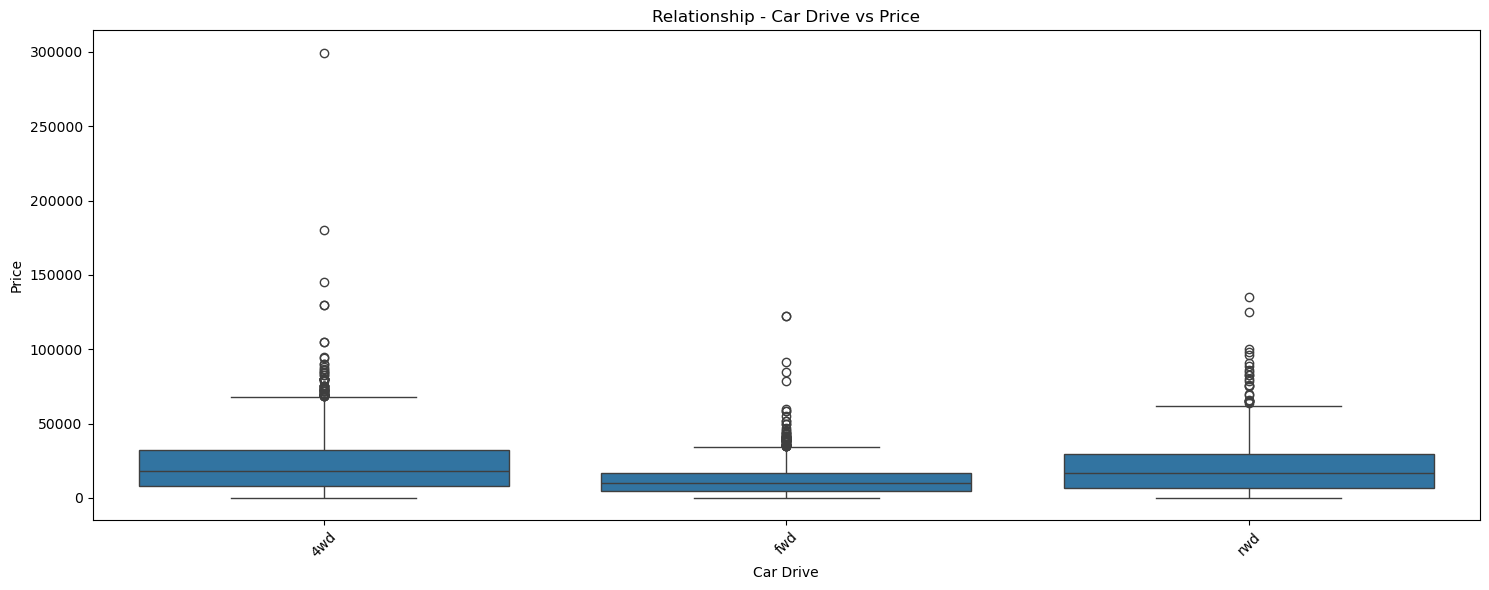

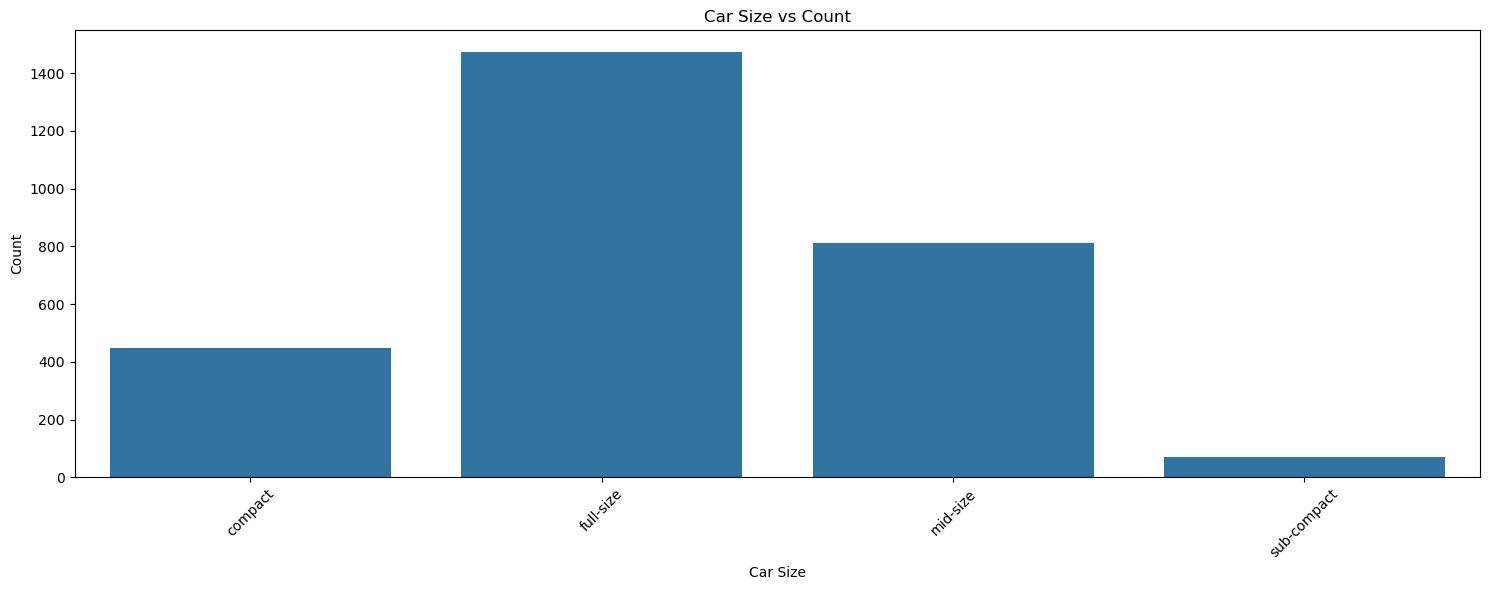

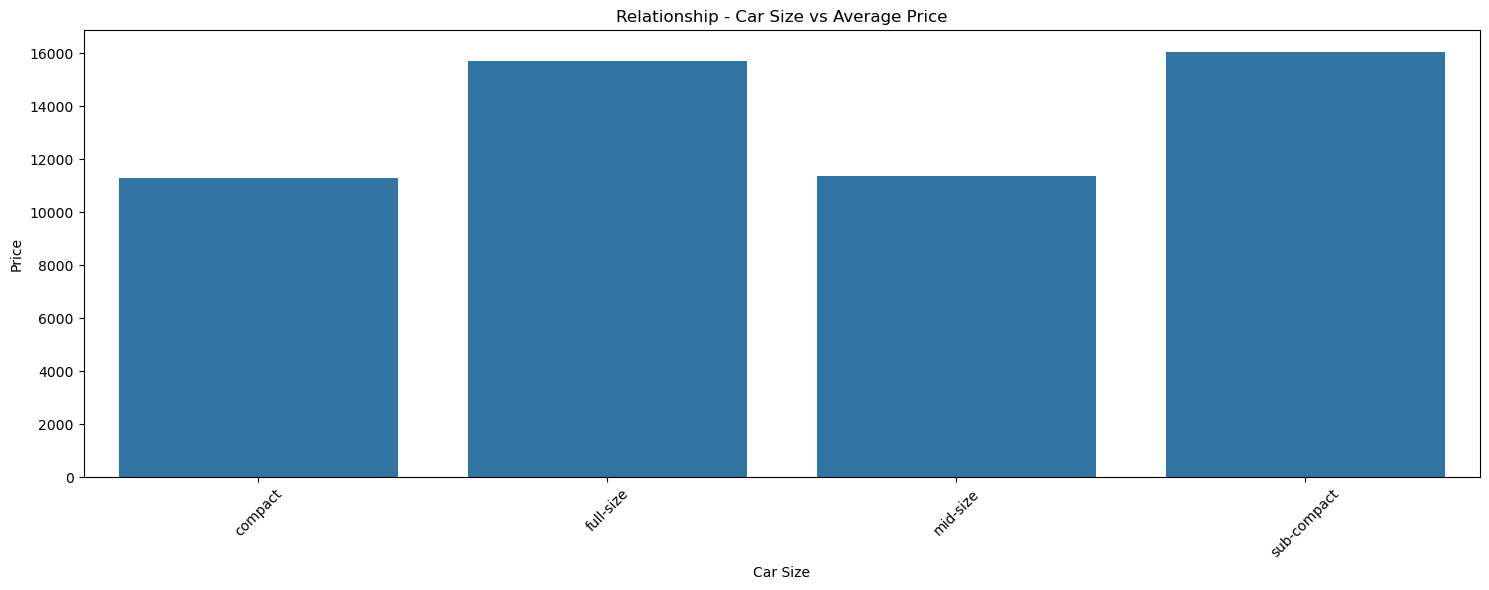

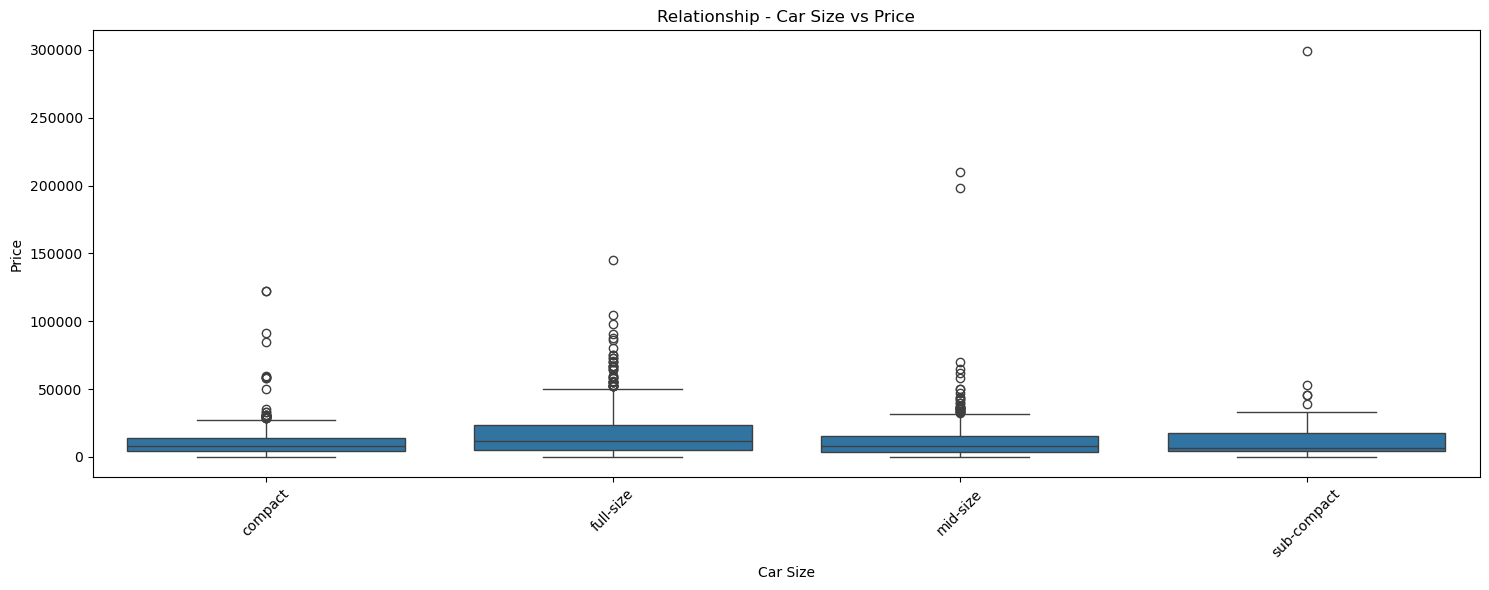

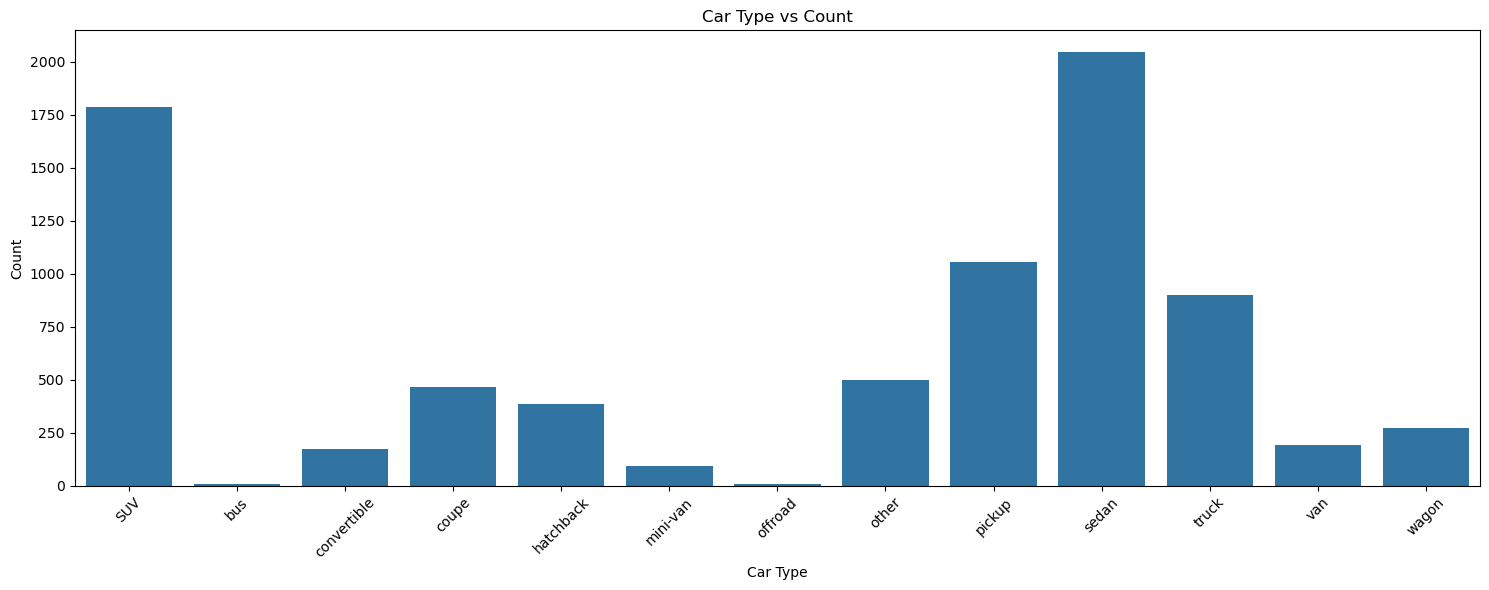

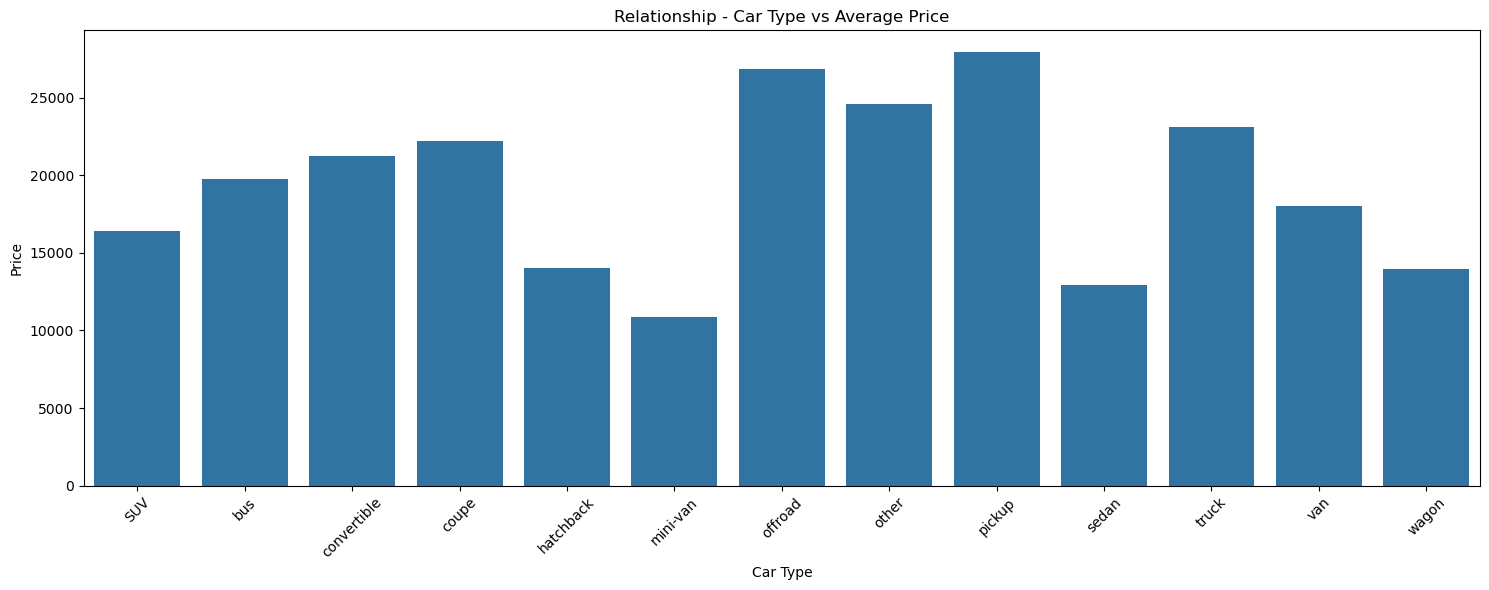

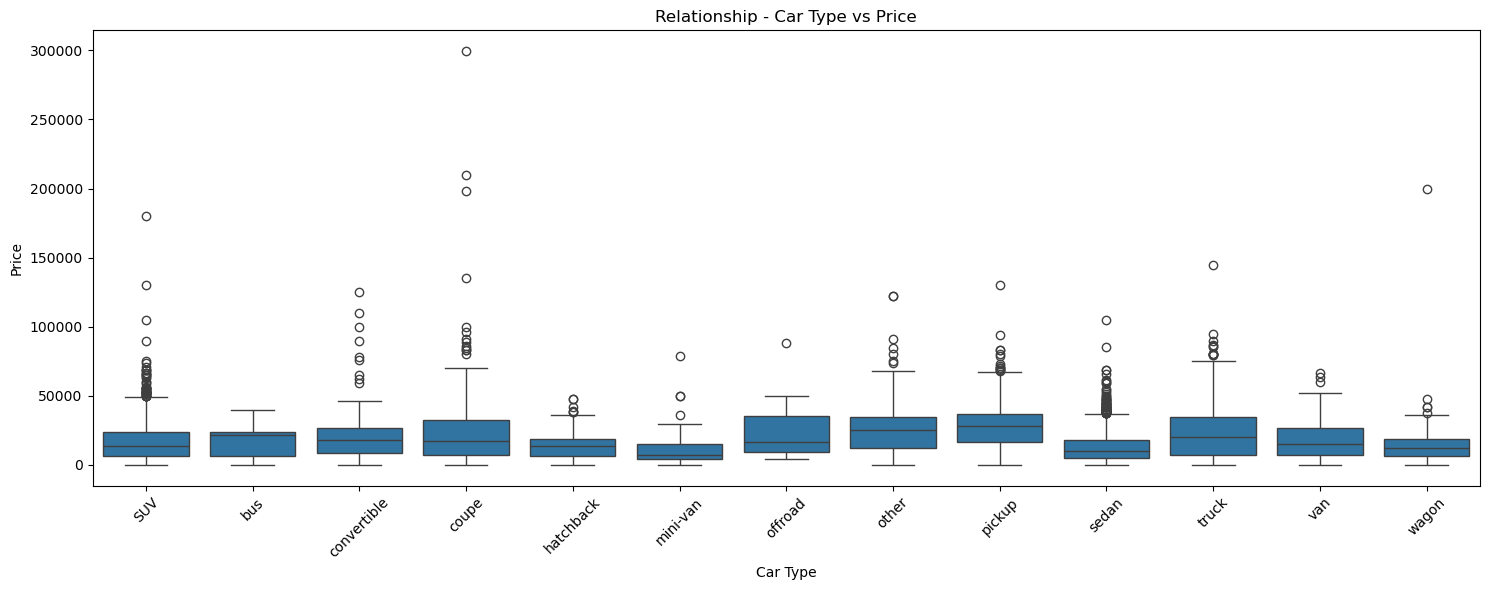

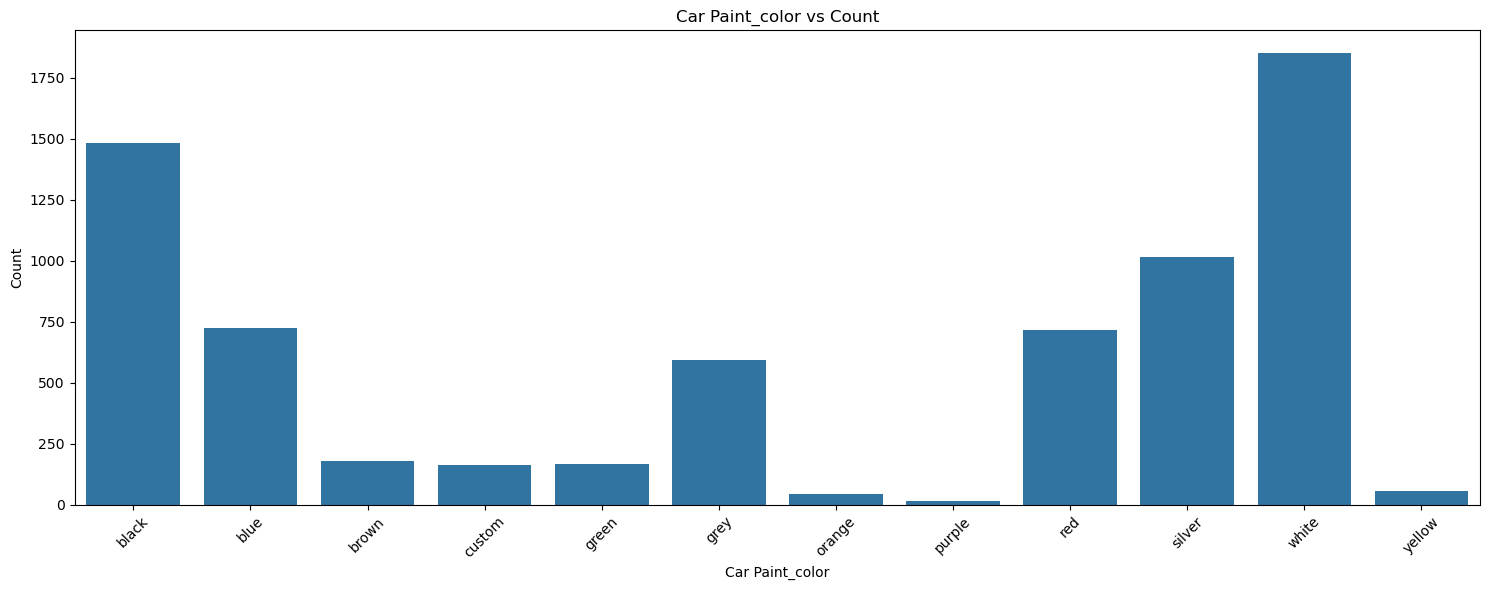

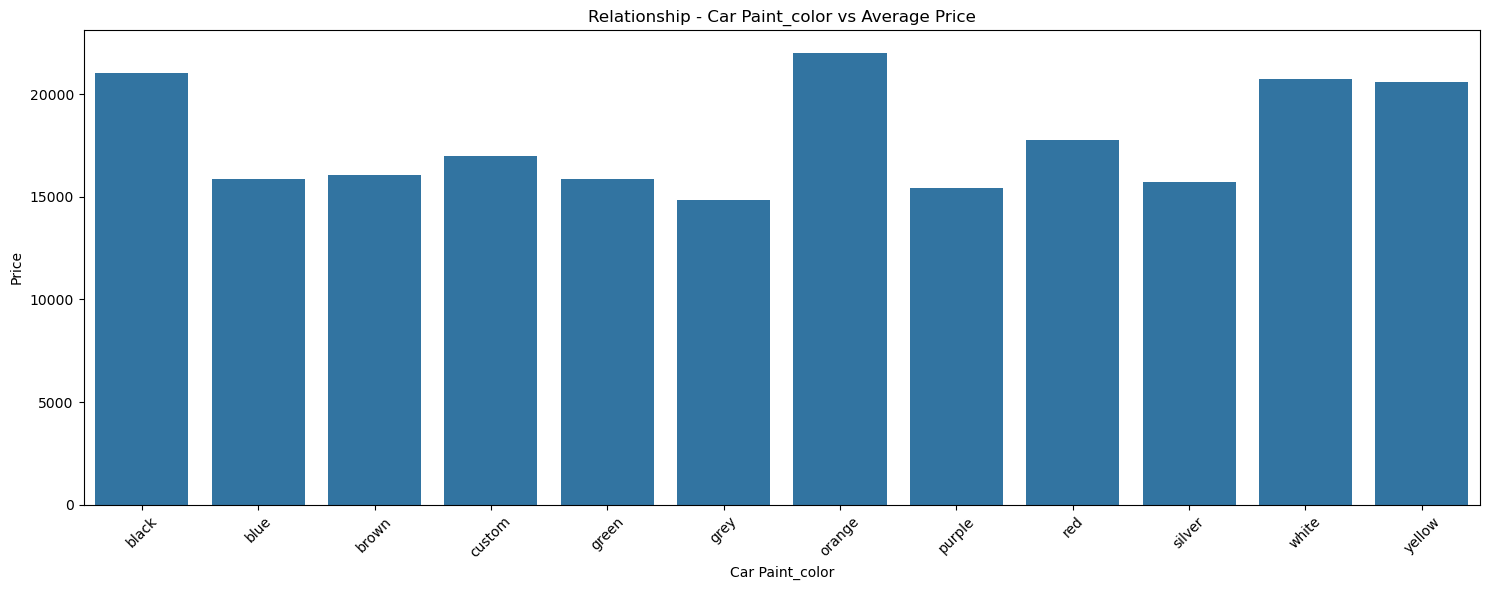

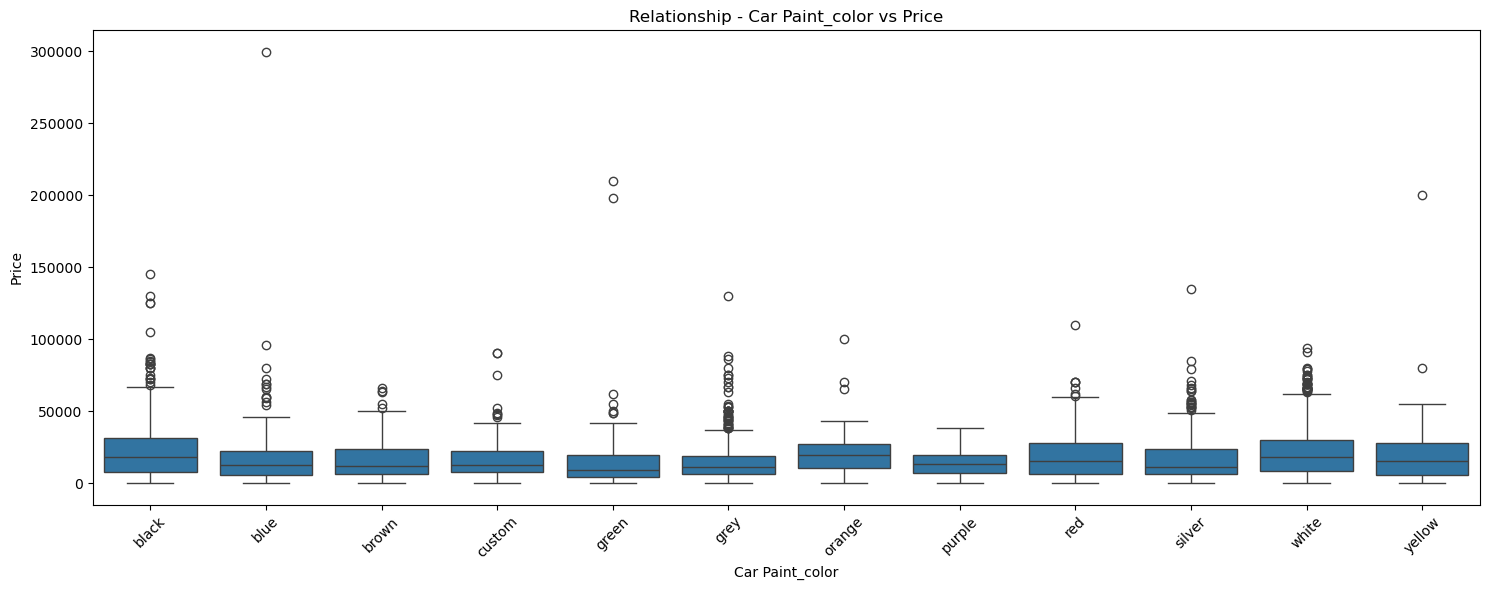

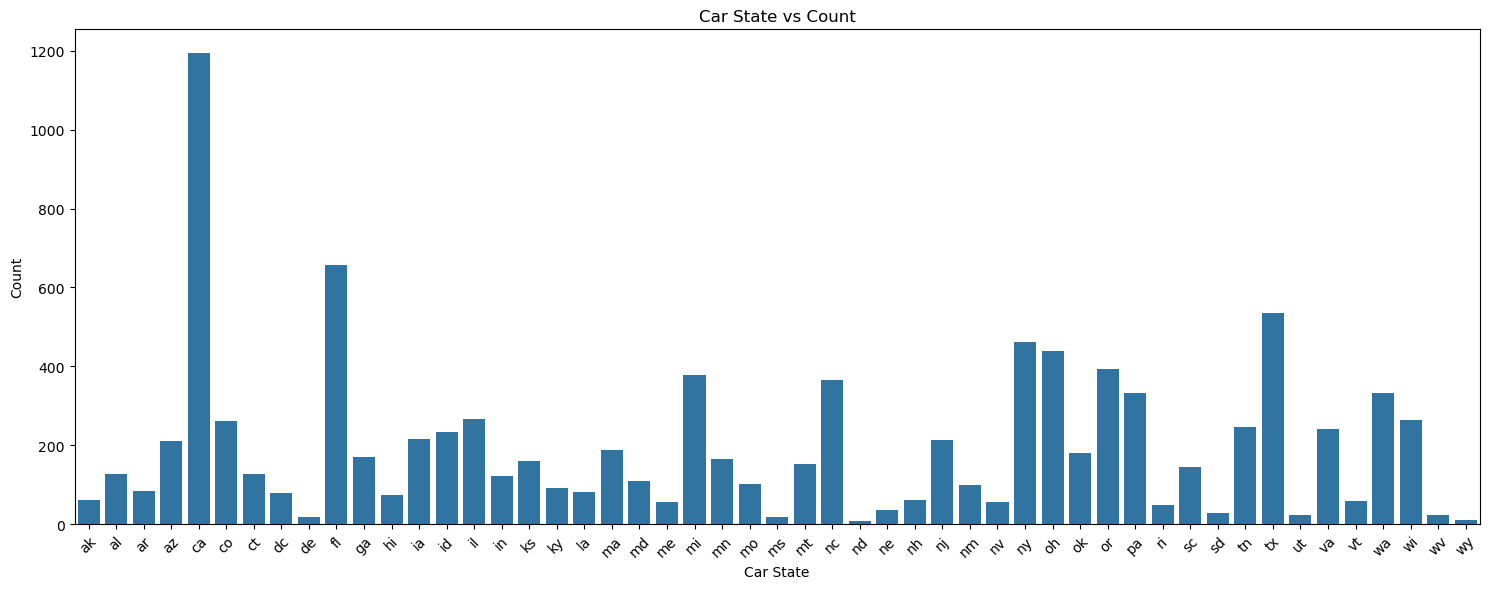

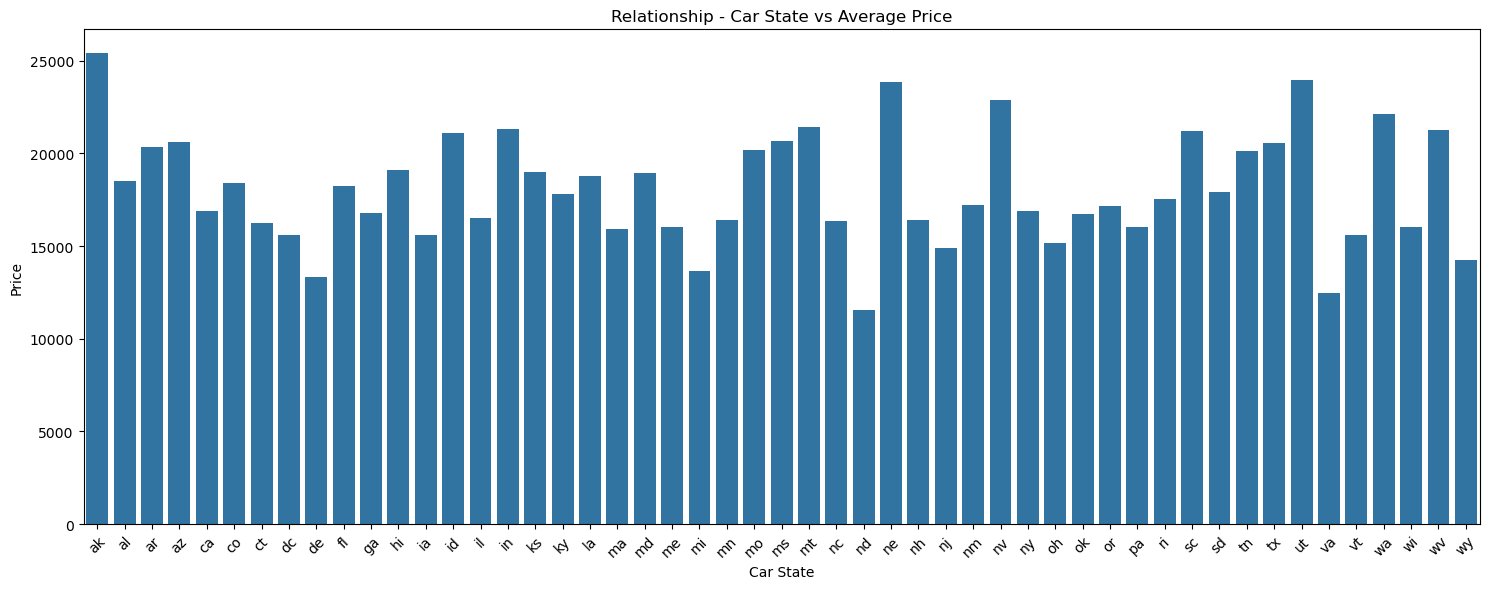

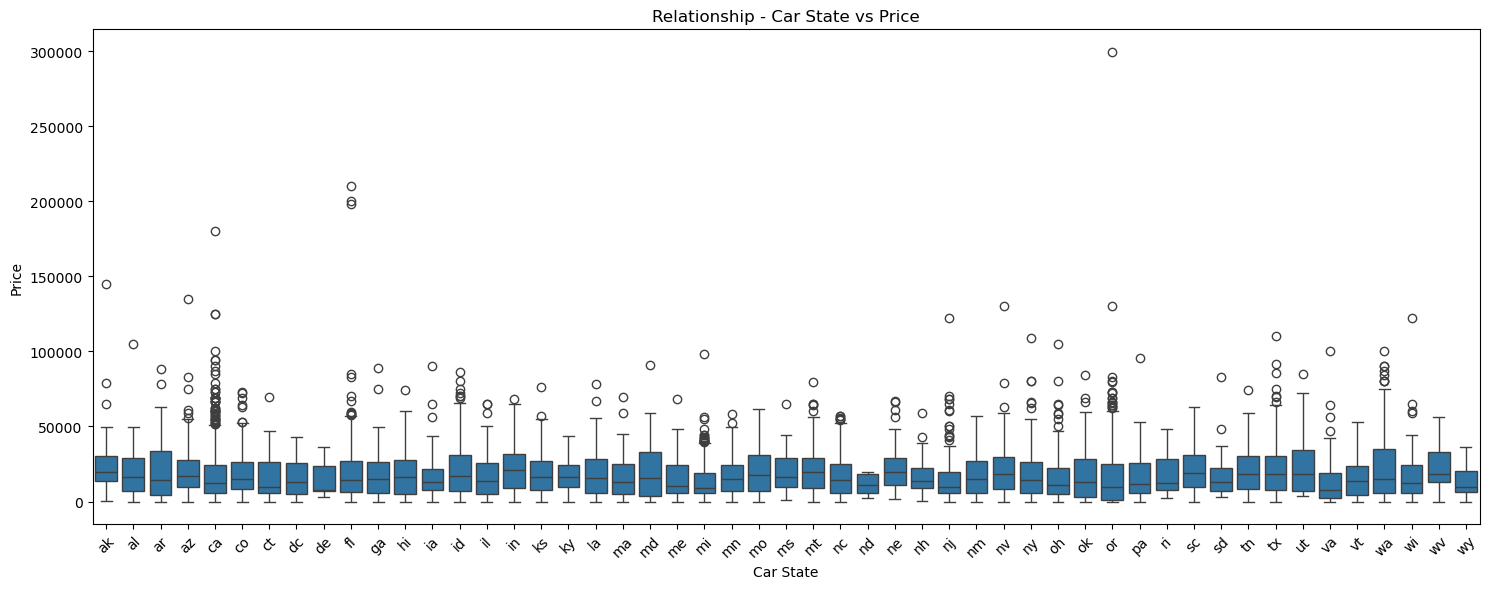

In [81]:

#feature analysis
display(car_df.info())
display(car_df.describe())
display(car_df.sample(10))
display(f'dups:  {car_df.duplicated().sum()}')
display(car_df.corr(numeric_only=True)) 

#show NaN proportion 
car_df_mean = car_df.isnull().mean() * 100
car_df_mean.sort_values().plot(kind='barh')
plt.xlabel('Proportion (%) of Missing Values')
plt.title('Missing Data by Feature')
plt.grid(axis='x')
plt.show()

car_df_sample = car_df.sample(10000, random_state=42)

#sampling 10k as histplot() 427k samples would take too much time and less than $200k cars the visual is more meaningful 
ax = sns.histplot(data = car_df_sample[car_df_sample['price'] < 200000], x='price')
ax.set_title('Price Distribution')
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Car Count')
plt.show()

#Year greater than 1960 cars the visual is more meaningful.  Most of the cars are manufactured towards the later years toward 2022. 
ax = sns.histplot(data = car_df_sample[car_df_sample['year'] > 1960], x='year')
ax.set_title('Distribution of Car Counts over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Car Count')
plt.show()

#Odometer less than 500000 for meaningful visual.
ax = sns.histplot(data = car_df_sample[car_df_sample['odometer'] < 500000], x='odometer')
ax.set_xlim(left=0, right=500000)
ax.set_title('Distribution of Car Counts per Odometer')
ax.set_xlabel('Odometer')
ax.set_ylabel('Car Count')
plt.show()

#Checking unique values for each feature
pd.set_option('display.max_colwidth', None)

#checking all unique values & percentage for each feature except the ones with too many
#display(car_df.columns.unique())
display(pd.Series({col: car_df[col].value_counts(normalize=True, dropna=False) for col in car_df.columns if col not in ['VIN', 'region', 'id', 'price', 'odometer', 'year']}))
display(pd.Series({col: car_df[col].unique().shape for col in car_df.columns if col not in [ 'VIN', 'id', 'price', 'odometer', 'year']}))


vc = car_df['fuel'].value_counts(normalize=True, dropna=False).reset_index().fillna('Missing') 
vc['proportion'] =  vc['proportion'] * 100
ax = sns.barplot(data=vc, x='fuel', y='proportion')
ax.set_title('Proportion (%) of Fuel Values')
ax.set_xlabel('Fuel Values')
ax.set_ylabel('Proportion (%)')
plt.show() 

 
vc = car_df['title_status'].value_counts(normalize=True, dropna=False).reset_index().fillna('Missing') 
vc['proportion'] =  vc['proportion'] * 100
ax = sns.barplot(data=vc, x='title_status', y='proportion',)
ax.set_title('Proportion (%) of Title Status Values')
ax.set_xlabel('Title Status Values')
ax.set_ylabel('Proportion (%)')
plt.show() 
 
# wanted to plot model, however, too many unqiue values for model and it would be impossible to label each one
# plt.figure(figsize=[15, 6])
# car_df_price_mean = car_df_sample.groupby(by='model')['price'].mean().reset_index()
# display(car_df_price_mean)
# ax=sns.scatterplot(data=car_df_price_mean, x='model', y='price')
# ax.set_title('Relationship - Car Model vs Price')
# ax.set_xlabel('Car Model')
# ax.set_ylabel('Price')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show() 

#scatterplotting by manufacturer for pricing made me realize this is for "used" car price, not a new car, so manufacturer may not be so correlated.
for col in car_df_sample.columns:
    colcap = col.capitalize()
    
    if(col not in ['model', 'VIN', 'id', 'price', 'odometer', 'region']):
        car_df_price_count = car_df_sample[car_df_sample['price'] < 900_000].groupby(by=col)['id'].count().reset_index().sort_values(by=col)
        car_df_price_count.columns = [col, 'count']
        plt.figure(figsize=[15, 6])
        ax=sns.barplot(data=car_df_price_count, x=col, y='count')
        ax.set_title(f'Car {colcap} vs Count')
        ax.set_xlabel(f'Car {colcap}')
        ax.set_ylabel('Count')
        if(col == 'year'):
            ax.tick_params(axis='x', labelsize=8)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show() 

        car_df_price_mean = car_df_sample[car_df_sample['price'] < 900_000].groupby(by=col)['price'].mean().reset_index().sort_values(by=col)
        plt.figure(figsize=[15, 6])
        ax=sns.barplot(data=car_df_price_mean, x=col, y='price')
        ax.set_title(f'Relationship - Car {colcap} vs Average Price')
        ax.set_xlabel(f'Car {colcap}')
        ax.set_ylabel('Price')
        if(col == 'year'):
            ax.tick_params(axis='x', labelsize=8)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show() 

        #Boxplot shows some outliers for manufacturer car price      
        car_df_mp= car_df_sample.loc[car_df_sample['price'] < 900_000, [col,'price']].sort_values(by=col)
        plt.figure(figsize=[15, 6])
        ax=sns.boxplot(data=car_df_mp, x=col, y='price')
        ax.set_title(f'Relationship - Car {colcap} vs Price')
        ax.set_xlabel(f'Car {colcap}')
        ax.set_ylabel('Price')
        if(col == 'year'):
            ax.tick_params(axis='x', labelsize=8)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show() 


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Data Cleaning Steps
1. *Check the the data to see if there are any actual data value problems.*
2. *Using domain knowledge, see if there are features that can be eliminated.*
3. *Update data types as needed.*
4. *Check for duplicates and remove.* 
5. *Check for nulls and remove with valid reasoning such as proportion of null for the feature is insignicant or significant but feature is absolutely necessary for ML based on the domain knowledge and etc.*
6. *If features are remove after removing duplicates, need to check for duplicates again and remove them again.*  

#### Data Cleaned
1. *vin - remove, irrelevant for the pricing*
2. *id - remove, irrelevant for the pricing*
3. *region - somewhat overlapping with state.  More specific location than the state, however since this has too many values, will start with state level to see if location have high impact on the pricing and if it does, then we can go further into region with specific states having high impacts the pricing.* 
4. *manufacturer, type and model - will be kept due to each feature's correlation to pricing even though they mean similar things.  PCA may help reduce dimensionality.*
5. *title_status - less than 2% is non-clean and 2% is clean.  Other statuses will likely show up as outlier with small amount of data. It should be removed for proper testing of majority data*
6. *drive - usually rwd is equipped with more luxury cars than the fwd and also, 4wd is always more expansive than 2wd (rwd and fwd).  knowing this and the fact that the dataset is missing more than 30% of the values, we should remove this, but for now keeping it to see removing nulls for other features, such as condition and cyliders, would remove much of the drive null data as well to see if this feature can be kept as a whole*
7. *paint_color - similar reasoning as drive.  specific color maybe more expasive, but 30% data missing, so I cannot remove the feature, but lots missing data.  see if other feature removal removes NaNs for this first.*
8. *year - change it to int instead of float*
9. *Remove nulls for small amount of data as low % NaN data will have not much impact to overall testing.*
10. *Remove nulls for bigger amount of data like 30% with a bit more scruitiny*
11. *Remove outliers using IQR*

In [82]:
#initial data removal - features based on domain knowlege 
car_df_clean = car_df[['price', 'year', 'model', 'manufacturer', 'type', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'paint_color', 'state' ]].copy()
#display(car_df_clean.info()) #427k samples
 
#2nd clean up for samples on condition and cylider as we know these affects the car prices.  cannot just remove this feature due to their importance
car_df_clean = car_df_clean.dropna(subset=['condition', 'cylinders'])
#display(f'dups 3:  {car_df_clean.duplicated().sum()}')
#display(car_df_clean.isnull().mean())
#display(car_df_clean.info()) #181.5k samples

#3rd clean up for additional samples on other features
car_df_clean = car_df_clean.dropna(subset=['model', 'type', 'manufacturer', 'odometer', 'transmission'])
#display(f'dups 4:  {car_df_clean.duplicated().sum()}')
#display(car_df_clean.isnull().mean())
#display(car_df_clean.info()) #152k 
 
#each values are widely spread from cleaned data so far so keeping the feature make sense without NaN in this case and each features are below 15% NaN, so for better testing, removing NaN from the feature samples  
#print(car_df_clean['drive'].value_counts(normalize=True, dropna=False))
#print(car_df_clean['paint_color'].value_counts(normalize=True, dropna=False))

#after iterations of NaN removal reasoning, ending up keeping drive and paint_color, but also removing NaN sample.  Maybe I could have just removed the NaN from the beginning as data ended up into the state where I could've just do car_df.dropna() from the beginning.
car_df_clean = car_df_clean.dropna(subset=['drive', 'paint_color'])

#dropping duplicates at the end of data removal process to make sure all duplicates are removed with the final dataset.
car_df_clean = car_df_clean.drop_duplicates()
#display(car_df_clean.info()) #90k samples 
#display(f'dups 5:  {car_df_clean.duplicated().sum()}') #no more dups
#display(car_df_clean.isnull().mean())  #no more NaN

#After removing unneeded features and NaN values, only about a little 20% of original data remains.

#Changing year and odometer to int
car_df_clean[['year', 'odometer']] = car_df_clean[['year', 'odometer']].astype(dtype=int)

#It probably make sense to use only recent year data like starting from 2000 instead of from 1900 or 1960.
car_df_clean = car_df_clean[car_df_clean['year'] > 2000]  #80k samples
 
#remove outliers using IQR
for col in car_df_clean.select_dtypes(include='number').columns:
    first_quartile = car_df_clean[col].quantile(.25)
    third_quartile = car_df_clean[col].quantile(.75)
    iqr = car_df_clean[col].quantile(.75) - car_df_clean[col].quantile(.25)
    lower = first_quartile - 1.5*iqr
    upper = third_quartile + 1.5*iqr
    car_df_clean = car_df_clean.loc[(car_df_clean[col]>lower) & (car_df_clean[col]<upper)]

display(f'final dups:  {car_df_clean.duplicated().sum()}')
display(car_df_clean.info()) 
car_df_clean.sample(100)


'final dups:  0'

<class 'pandas.core.frame.DataFrame'>
Index: 76252 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         76252 non-null  int64 
 1   year          76252 non-null  int32 
 2   model         76252 non-null  object
 3   manufacturer  76252 non-null  object
 4   type          76252 non-null  object
 5   condition     76252 non-null  object
 6   cylinders     76252 non-null  object
 7   fuel          76252 non-null  object
 8   odometer      76252 non-null  int32 
 9   transmission  76252 non-null  object
 10  drive         76252 non-null  object
 11  paint_color   76252 non-null  object
 12  state         76252 non-null  object
dtypes: int32(2), int64(1), object(10)
memory usage: 7.6+ MB


None

,price,year,model,manufacturer,type,condition,cylinders,fuel,odometer,transmission,drive,paint_color,state
290315,14900,2012,econoline,ford,van,like new,8 cylinders,gas,71180,automatic,rwd,white,oh
13797,500,2003,forester 2.5 x,subaru,wagon,fair,4 cylinders,gas,246000,automatic,4wd,blue,az
169404,5299,2005,silverado 1500,chevrolet,pickup,good,8 cylinders,gas,247000,automatic,4wd,silver,ks
156660,10998,2004,wrangler x,jeep,SUV,good,6 cylinders,gas,178842,automatic,4wd,black,ia
343901,3300,2001,avalon,toyota,sedan,good,6 cylinders,gas,171000,automatic,fwd,green,ri
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71562,8000,2013,c-max hybrid sel,ford,hatchback,excellent,4 cylinders,gas,78090,automatic,fwd,black,ca
270817,1100,2008,aura,saturn,sedan,good,4 cylinders,gas,126000,automatic,fwd,custom,ny
84997,5995,2010,legacy,subaru,other,excellent,4 cylinders,gas,138775,automatic,4wd,grey,ct
342335,5700,2013,impala,chevrolet,sedan,excellent,6 cylinders,gas,104000,automatic,fwd,grey,ri


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Selecting the Best Model
1. *Do preprocessing using following methods*
    - *Use GridSearchCV to find the best hyperparameters*
    - *Use PolynomialFeatures to transform linear to higher degree polinomial combination to capture non-linear relationship*
    - *Use StandardScaler to scale numeric data*
    - *Use OrdinalEncoder to use ordinals for the features with ordinality for better understanding by ML*
    - *Use OneHotEncoder to make object features to numeric features for better understanding by ML*
2. *Reduction of dimensionality and Clustering for ML efficiency*
    - *Use PCA to reduce dimensionality*
    - *Use KMeans for clustring*
3. *Use Regression models*
    - *LinearRegression*
    - *Ridge*
    - *Lasso*

#### Findings
1. *With final dataset, it took 15+ minutes to run all LinearRegression, Ridge and Lasso.*
2. *This is due to high dimensionality and amount of data*
    - *Because of high dimensionality and amount of data, even PCA and KMeans added more significant amount of processing time.*
    - *Realized that applying all preprocessing methods and PCA and KMeans can really slow down the processing time.*
3. *Looked for opportunity to reduce feature even more after evalation and re-run the modeling.* 


'final dups:  0'

<class 'pandas.core.frame.DataFrame'>
Index: 76252 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         76252 non-null  int64 
 1   year          76252 non-null  int32 
 2   model         76252 non-null  object
 3   manufacturer  76252 non-null  object
 4   type          76252 non-null  object
 5   condition     76252 non-null  object
 6   cylinders     76252 non-null  object
 7   fuel          76252 non-null  object
 8   odometer      76252 non-null  int32 
 9   transmission  76252 non-null  object
 10  drive         76252 non-null  object
 11  paint_color   76252 non-null  object
 12  state         76252 non-null  object
dtypes: int32(2), int64(1), object(10)
memory usage: 7.6+ MB


None

Best degree: 1
Best PCA component: 150
Best KMean cluster: 14
Train MSE: 40284612.562996455 Test MSE: 40315238.81491253
Train RMSE: 6347.016036138278 Test RMSE: 6349.428227400679


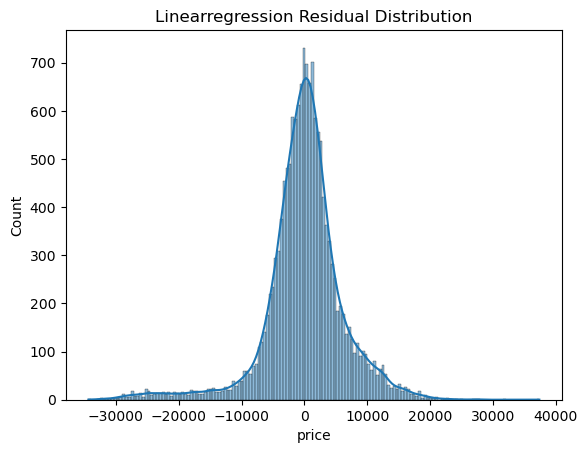

              Importance
year            0.293969
odometer        0.174246
cylinders       0.139322
drive           0.053238
transmission    0.032545
type            0.022523
fuel            0.010244
paint_color     0.002122
model           0.000584
manufacturer    0.000120
state          -0.000079
condition      -0.000846
Best degree: 1
Best PCA component: 150
Best KMean cluster: 14
Best alpha: 1.0
Train MSE: 40284700.8137414 Test MSE: 40313919.39232872
Train RMSE: 6347.022988278946 Test RMSE: 6349.324325652984


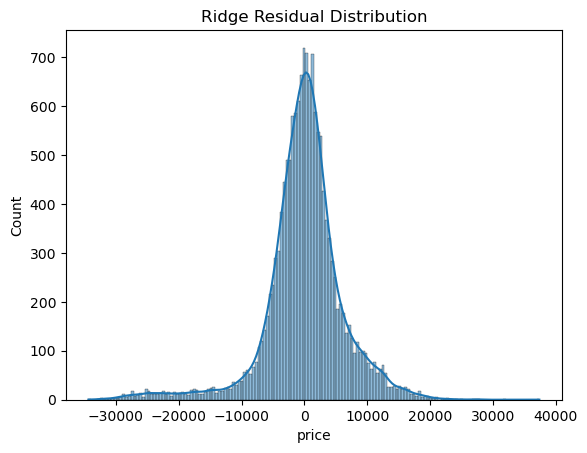

              Importance
year            0.296028
odometer        0.177348
cylinders       0.138171
drive           0.052385
transmission    0.032172
type            0.022806
fuel            0.010119
paint_color     0.002340
model           0.000605
state          -0.000119
manufacturer   -0.000246
condition      -0.000772
Best degree: 1
Best PCA component: 150
Best KMean cluster: 14
Best alpha: 0.1
Train MSE: 40284751.416510046 Test MSE: 40313778.481624715
Train RMSE: 6347.026974616544 Test RMSE: 6349.313229131534


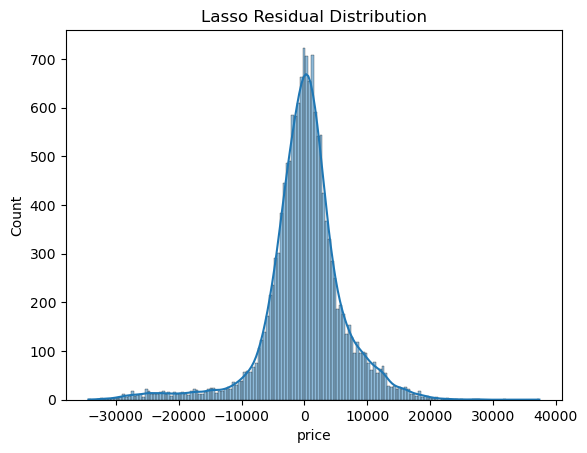

              Importance
year            0.297119
odometer        0.177665
cylinders       0.136285
drive           0.051947
transmission    0.032901
type            0.021478
fuel            0.010119
paint_color     0.001756
model           0.000536
state          -0.000136
condition      -0.000565
manufacturer   -0.000642


In [79]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance



display(f'final dups:  {car_df_clean.duplicated().sum()}')
display(car_df_clean.info()) 

#for quicker test
#car_df_clean = car_df_clean.sample(10000, random_state=42)

X, y = car_df_clean.drop(labels=['price'], axis = 1), car_df_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)



number_list = ['year', 'odometer']
ohe_list = ['model', 'manufacturer', 'type', 'fuel', 'transmission', 'drive', 'paint_color', 'state']
ordinal_features = ['condition', 'cylinders']
condition_ordinal_values = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
cylinders_ordinal_values = ['other', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders']

list_of_models = [LinearRegression(), Ridge(), Lasso()]

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler())
    ]), number_list),
    ('ord', OrdinalEncoder(categories=[condition_ordinal_values, cylinders_ordinal_values]), ordinal_features),
    ('nom', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), ohe_list)
])

for model in list_of_models:
    # Full pipeline
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('pca', PCA()),
        ('cluster', KMeans(random_state=42)),
        ('regressor', model)
    ])

    # Grid search over degree and alpha
    if isinstance(model, LinearRegression):
        param_grid = {
            'preprocess__num__poly__degree': [1, 2], #[1, 2, 3, 4],         #best 1 with full dataset
            'pca__n_components': [100, 150, 200],                            #best 100 with full dataset
            'cluster__n_clusters': [12, 13, 14, 15] #[9, 10, 11, 12] #[6, 7, 8, 9] #[3, 4, 5, 6]               #best 14 with full dataset
        }
    else:
        param_grid = {
            'preprocess__num__poly__degree': [1, 2], #[1, 2, 3, 4],         #best 1 with full dataset
            'pca__n_components': [100, 150, 200], #[50, 100, 150],                            #best 100 with full dataset
            'cluster__n_clusters': [12, 13, 14, 15], #[9, 10, 11, 12], #[6, 7, 8, 9], #[3, 4, 5, 6],             #best xx with full dataset
            'regressor__alpha': [0.1, 1.0, 10.0] #[0.1, 0.5, 1.0, 5, 10.0]  #best 0.1 with full dataset
        }

    grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)

    print("Best degree:", grid.best_params_['preprocess__num__poly__degree'])
    print('Best PCA component:', grid.best_params_['pca__n_components'])
    print('Best KMean cluster:', grid.best_params_['cluster__n_clusters'])
    if not isinstance(model, LinearRegression):
        print("Best alpha:", grid.best_params_['regressor__alpha'])

    model_train_preds = grid.predict(X_train)
    model_test_preds = grid.predict(X_test)

    model_train_mse = mean_squared_error(y_true=y_train, y_pred=model_train_preds)
    model_test_mse = mean_squared_error(y_true=y_test, y_pred=model_test_preds)

    print(f'Train MSE: {model_train_mse}', f'Test MSE: {model_test_mse}')
    print(f'Train RMSE: {np.sqrt(model_train_mse)}', f'Test RMSE: {np.sqrt(model_test_mse)}')

    residuals = y_test - model_test_preds
    sns.histplot(residuals, kde=True)
    plt.title(f'{model.__class__.__name__.capitalize()} Residual Distribution')
    plt.show()

    m = grid.best_estimator_#.named_steps['regressor']
    results = permutation_importance(m, X_test, y_test)
    importances = pd.DataFrame(data=results.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    print(importances)




### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Evaluation Steps
1. *Find MSE and RMSE to see how well the model performs.*
2. *Review the sign of overfitting per MSE and RMSE values.*
3. *Review the sign of overfitting visually with residual distribution histogram plot.*
4. *Review the list of features in the order of importance for the used car price.*
5. *Re-visit data preparation to remove least important feature and re-run the model and evalute again.*

#### Findings
1. *Initially, with high dimensional dataset due to leaving in featurs such as model, state and manufacturers, processing took a long time, 15+ minutes.*
2. *After reviewing the feature importance data, there some features that are not important at all for the used car price.*
3. *Removed the least important features (ex: while not important, model feature ended up with 3000+ features due to OneHotEncoder and applied PolynomialFeatures) and re-ran and because the dimensionality reduced from thousands to tens, processing time dramatically reduce and prediction accuracy didn't get affected much.*
4. *When additional features were removed, the hyperparameters changed due to the data variance and dimensionality changes.*
5. *Data didn't show much sign of gaining from applying clustering step due to data being so variant.  Applying higher n_cluster didn't help.*
6. *With optimal dataset removing much of the features (remainder: 'price', 'year', 'type', 'condition', 'cylinders', 'odometer', 'transmission', 'drive'), all three models results were about the same.*
7. *So given the result, LinearRegression could be the best option given the accuracy, resource consumption and processing time.*
    -*all models shown about the same prediction and no signs of overfitting reviewing residual distrition being centered around zero with normal-ish distribution*      
8. *With high dimensional data, type was not in top high importance list, but with more optimal dimensional data, type became higher.*
9. *Per evaluation, year, odometer, type and cylinders are the most important features.* 

Best degree: 2
Best PCA component: 20
Train MSE: 38206831.52032942 Test MSE: 38850633.691117086
Train RMSE: 6181.167488454703 Test RMSE: 6233.027650437392


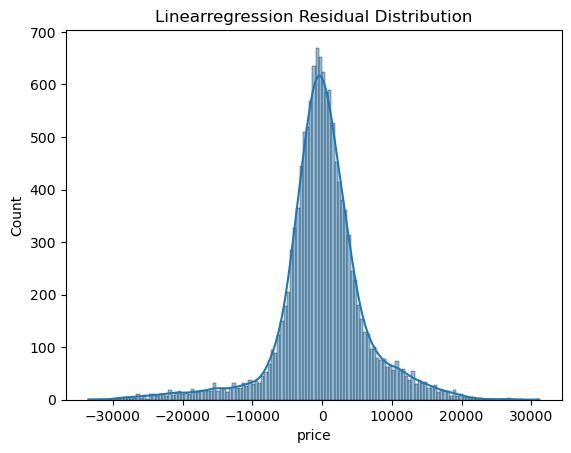

              Importance
year            0.327875
odometer        0.110214
type            0.101571
cylinders       0.076253
drive           0.054700
transmission    0.021556
condition       0.007245
Best degree: 2
Best PCA component: 20
Best alpha: 10.0
Train MSE: 38207049.843256675 Test MSE: 38851085.840926334
Train RMSE: 6181.1851487604445 Test RMSE: 6233.0639208118455


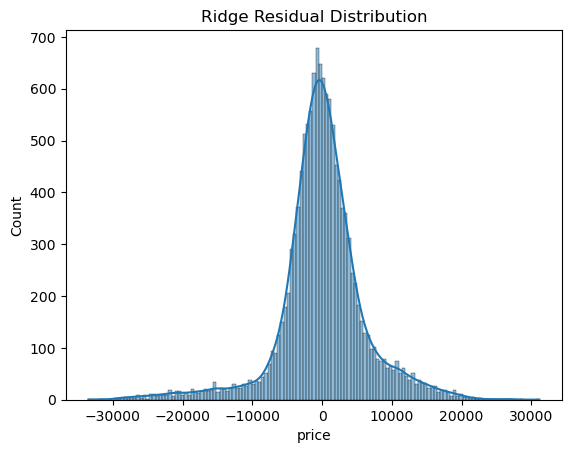

              Importance
year            0.327148
odometer        0.109796
type            0.100504
cylinders       0.074947
drive           0.055010
transmission    0.020108
condition       0.007521
Best degree: 2
Best PCA component: 20
Best alpha: 0.1
Train MSE: 38206838.11252734 Test MSE: 38850773.36452754
Train RMSE: 6181.168021703288 Test RMSE: 6233.038854726284


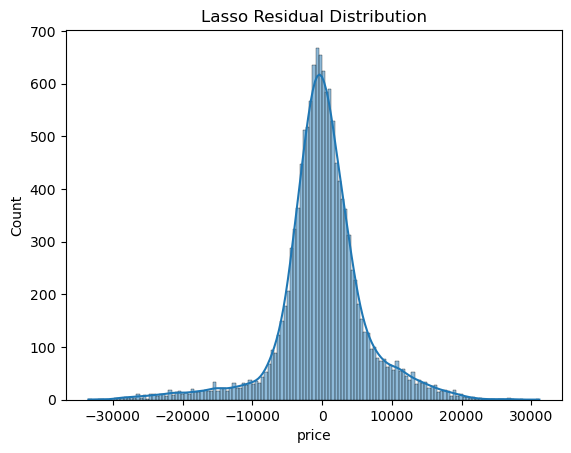

              Importance
year            0.326315
odometer        0.111213
type            0.099545
cylinders       0.073029
drive           0.052255
transmission    0.021339
condition       0.007412


In [ ]:
from sklearn.base import RegressorMixin
from typing import Any
import pandas as pd

def train_models_get_result (data: pd.DataFrame, model: RegressorMixin) -> dict:
    ret_dict = {}

    X, y = data.drop(labels=['price'], axis = 1), data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

    ret_dict['X'] = X
    ret_dict['y'] = y
    ret_dict['X_train'] = X_train
    ret_dict['X_test'] = X_test
    ret_dict['y_train'] = y_train
    ret_dict['y_test'] = y_test

# fuel            0.005706
# paint_color     0.002342
# manufacturer    0.000984
# model           0.000819
# state           0.000217

    number_list = ['year', 'odometer']
    ohe_list = ['type', 'transmission', 'drive']
    ordinal_features = ['condition', 'cylinders']
    condition_ordinal_values = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
    cylinders_ordinal_values = ['other', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders']

    preprocessor = ColumnTransformer([
        ('num', Pipeline([
            ('poly', PolynomialFeatures(include_bias=False)),
            ('scaler', StandardScaler())
        ]), number_list),
        ('ord', OrdinalEncoder(categories=[condition_ordinal_values, cylinders_ordinal_values]), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', drop='if_binary'), ohe_list)
    ])

    
        # Full pipeline
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('pca', PCA()),
        #('cluster', KMeans(random_state=42)),
        ('regressor', model)
    ])

    # Grid search over degree and alpha
    if isinstance(model, LinearRegression):
        param_grid = {
            'preprocess__num__poly__degree': [1, 2], #, 3], #, 4, 5],         #best 1 with full dataset
            'pca__n_components': [10, 15, 20, 30]#,                            #best 100 with full dataset
            #'cluster__n_clusters': [6, 7, 8, 9] #[3, 4, 5, 6]               #best 6 with full dataset
        }
    else:
        param_grid = {
            'preprocess__num__poly__degree': [1, 2], #, 3], #, 4, 5],         #best 1 with full dataset
            'pca__n_components': [10, 15, 20, 30],                            #best 100 with full dataset
            #'cluster__n_clusters': [6, 7, 8, 9], #[3, 4, 5, 6],             #best 6 with full dataset
            'regressor__alpha': [0.1, 1.0, 10.0, 20.0] #[0.1, 0.5, 1.0, 5, 10.0]  #best 0.1 with full dataset
        }

    grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    ret_dict['grid'] = grid

    ret_dict['polynomial_best_degree'] = grid.best_params_['preprocess__num__poly__degree']
    ret_dict['pca_component_count'] = grid.best_params_['pca__n_components']
    #ret_dict['kmean_cluster_count'] = grid.best_params_['cluster__n_clusters']


    # print("Best degree:", grid.best_params_['preprocess__num__poly__degree'])
    # print('Best PCA component:', grid.best_params_['pca__n_components'])
    # print('Best KMean cluster:', grid.best_params_['cluster__n_clusters'])
    if not isinstance(model, LinearRegression):
        ret_dict['ridge_lasso_best_alpha'] = grid.best_params_['regressor__alpha']
        # print("Best alpha:", grid.best_params_['regressor__alpha'])
    

    model_train_preds = grid.predict(X_train)
    model_test_preds = grid.predict(X_test)

    ret_dict['model_train_preds'] = model_train_preds
    ret_dict['model_test_preds'] = model_test_preds

    return ret_dict

def evaluate_result(ret_dict: dict, model: RegressorMixin) -> None:
    print("Best degree:", ret_dict['polynomial_best_degree'])
    print('Best PCA component:', ret_dict['pca_component_count'])
    #print('Best KMean cluster:', ret_dict['kmean_cluster_count'])
    if not isinstance(model, LinearRegression):
        print("Best alpha:", ret_dict['ridge_lasso_best_alpha'])

    model_train_mse = mean_squared_error(y_true=ret_dict['y_train'], y_pred=ret_dict['model_train_preds'])
    model_test_mse = mean_squared_error(y_true=ret_dict['y_test'], y_pred=ret_dict['model_test_preds'])

    print(f'Train MSE: {model_train_mse}', f'Test MSE: {model_test_mse}')
    print(f'Train RMSE: {np.sqrt(model_train_mse)}', f'Test RMSE: {np.sqrt(model_test_mse)}')

    residuals = ret_dict['y_test'] - ret_dict['model_test_preds']
    sns.histplot(residuals, kde=True)
    plt.title(f'{model.__class__.__name__.capitalize()} Residual Distribution')
    plt.show()

    m = ret_dict['grid'].best_estimator_ 
    results = permutation_importance(m, ret_dict['X_test'], ret_dict['y_test'])

    importances = pd.DataFrame(data=results.importances_mean, index=ret_dict['X'].columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    print(importances)


#run for each model and print out the analysis

car_df_LR = car_df_clean[['price', 'year', 'type', 'condition', 'cylinders', 'odometer', 'transmission', 'drive']].copy()
car_df_LR = car_df_LR.drop_duplicates()

model = LinearRegression()
ret_dict = train_models_get_result(data = car_df_LR, model = model)
evaluate_result(ret_dict = ret_dict, model = model)

model = Ridge()
ret_dict = train_models_get_result(data = car_df_LR, model = model)
evaluate_result(ret_dict = ret_dict, model = model)

model = Lasso()
ret_dict = train_models_get_result(data = car_df_LR, model = model)
evaluate_result(ret_dict = ret_dict, model = model)


### Deployment

*Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.*

#### Goal
*The goal is to provide the list of data features that impacts the used car price so this will be able to tell the used car dealership what drives the car prices or in another words, what the consumers want in a used car*
#### Findings
*Year and odometer are the primary significant features that impacted the used car price.  Type and cylinders played secondary significant features.* 
#### Recommendation
*The used car dealership should keep the inventory of better year, odometer and cylinders and more attractive types of cars so the car prices are higher and at the same time, those are significant features that consumers look at in the used car.*